# Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

# Search Dataset from kaggle

In [2]:
!kaggle datasets list -s 'car-price-prediction'

ref                                                         title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
deepcontractor/car-price-prediction-challenge               Car Price Prediction Challenge                    429KB  2022-07-06 11:38:32           6567        131  0.9411765        
adhurimquku/ford-car-price-prediction                       Ford Car Price Prediction                         174KB  2022-04-11 10:15:03           4955         67  0.9411765        
hellbuoy/car-price-prediction                               Car Price Prediction Multiple Linear Regression    18KB  2019-10-15 16:45:27          50451        494  0.7058824        
milanvaddoriya/old-car-price-prediction                     Old car price prediction      

# Download the dataset

In [3]:
!kaggle datasets download -d "hellbuoy/car-price-prediction"

car-price-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


# Unzipping the dataset

In [4]:
import zipfile

In [5]:
import os

In [6]:
os.listdir("car")

['CarPrice_Assignment.csv', 'Data Dictionary - carprices.xlsx']

# Read the dataset

In [7]:
df=pd.read_csv('car/CarPrice_Assignment.csv')

In [8]:
#Splitting company name from CarName column
CompanyName = df['CarName'].apply(lambda x : x.split(' ')[0])
df.insert(3,"CompanyName",CompanyName)
df.drop(['CarName'],axis=1,inplace=True)
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [9]:
#checking shape
df.shape

(205, 26)

In [10]:
#checking the datatypes
df.dtypes

car_ID                int64
symboling             int64
CompanyName          object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [11]:
#checking if there are empty spaces present in dataframe
df.isin([' ']).sum()

car_ID              0
symboling           0
CompanyName         0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

<Axes: >

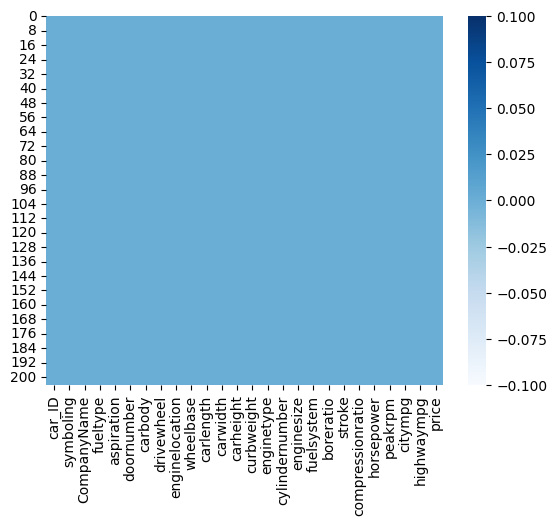

In [12]:
#data visualisation
sns.heatmap(df.isnull(),cmap='Blues')

In [13]:
# Checking Duplicates
df.duplicated().sum()

0

# Exploratory Data Analysis

In [14]:
df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [15]:
df.CompanyName = df.CompanyName.str.lower()

#Fixing invalid values There seems to be some spelling error in the CompanyName column.

maxda = mazda Nissan = nissan porsche = porcshce toyota = toyouta vokswagen = volkswagen = vw

In [16]:
df.replace('maxda','mazda',inplace=True)
df.replace('porcshce','porsche',inplace=True)
df.replace('toyouta','toyota',inplace=True)
df.replace('vokswagen','volkswagen',inplace=True)
df.replace('vw','volkswagen',inplace=True)

# Univariate analysis (Numerical data):

In [17]:
num_col = df.select_dtypes(exclude = 'object').columns
num_col

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [18]:
df[num_col].describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


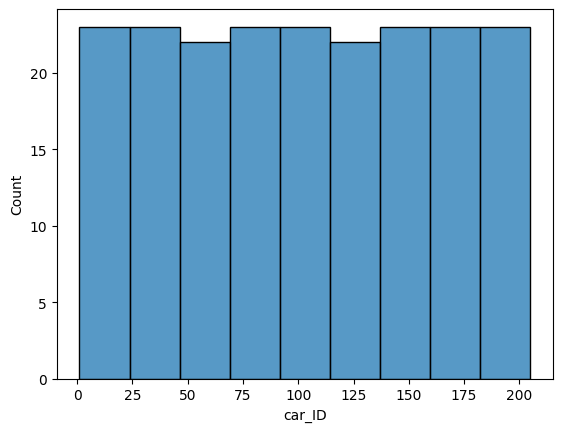

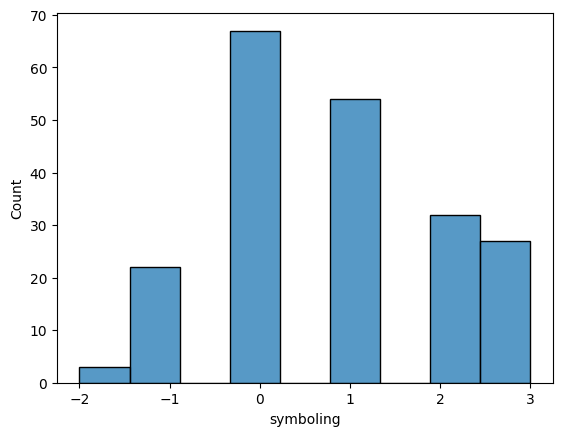

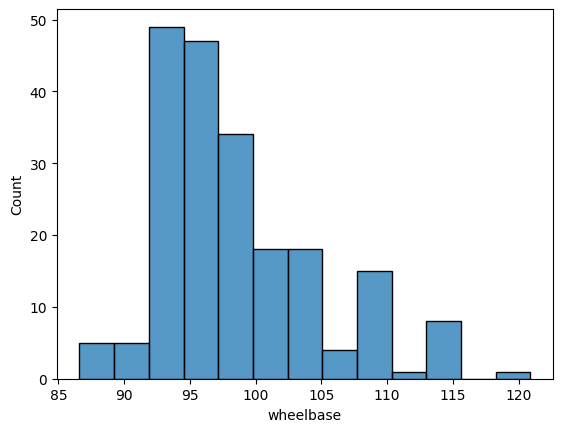

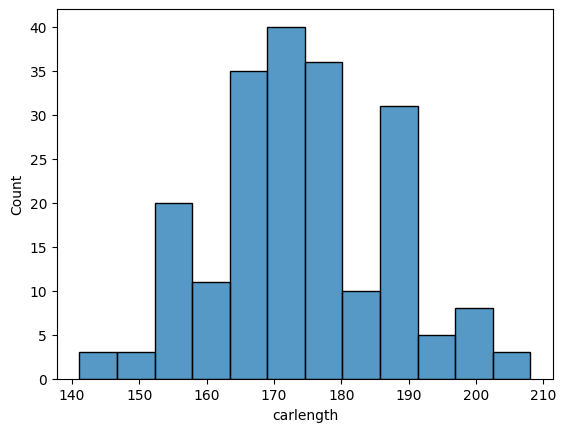

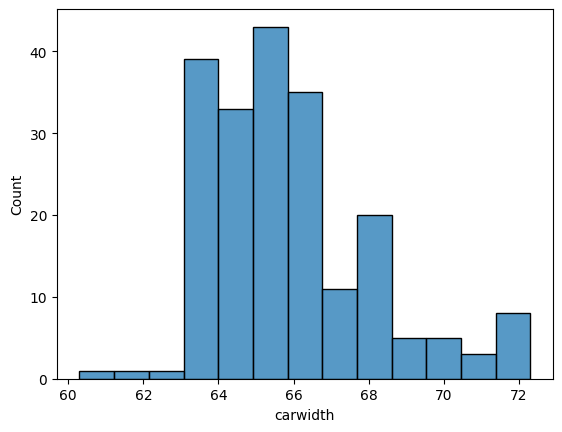

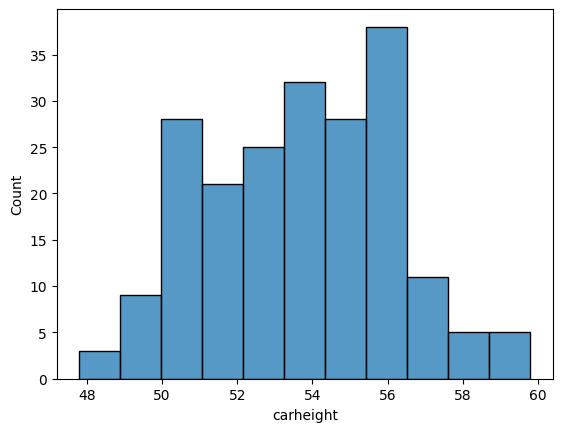

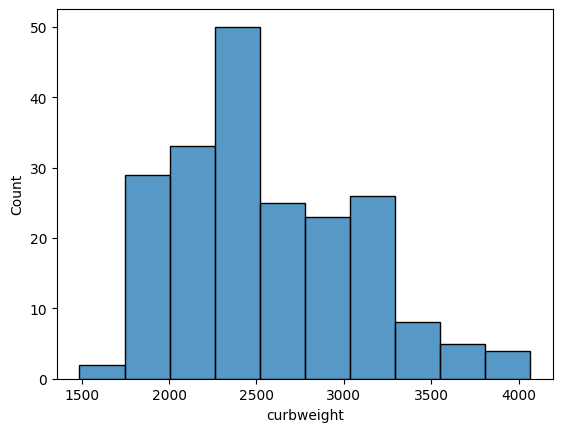

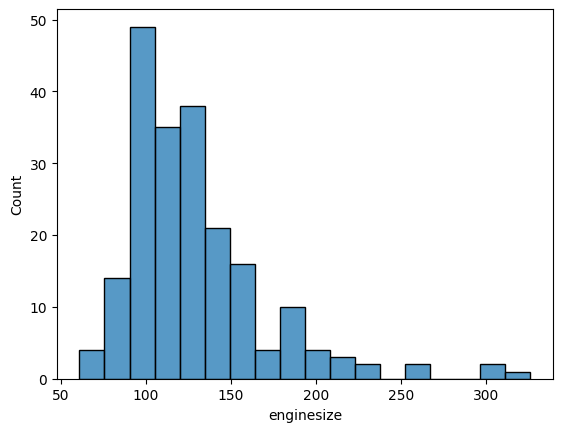

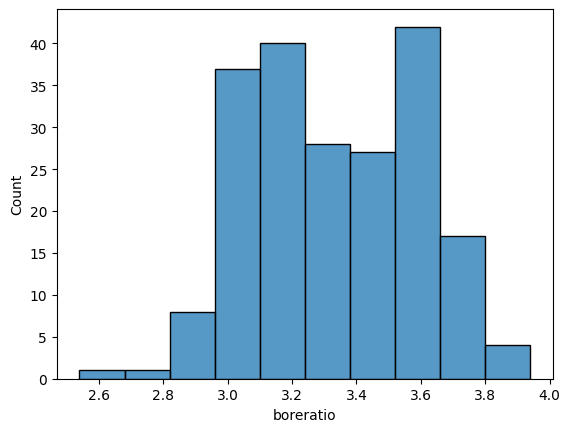

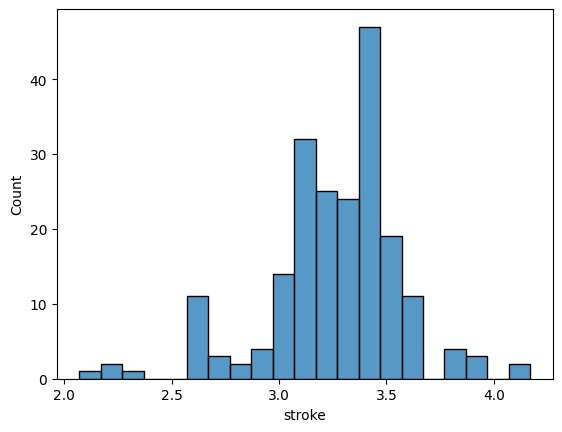

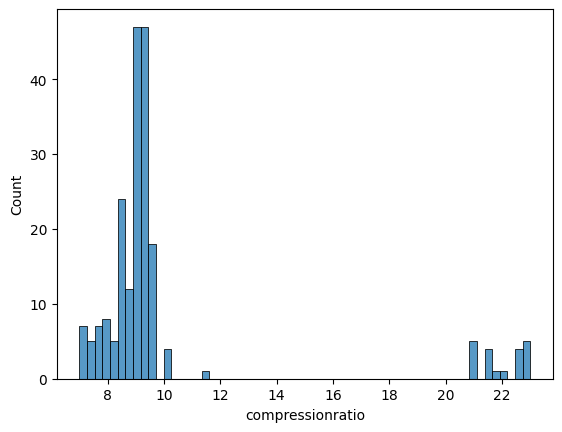

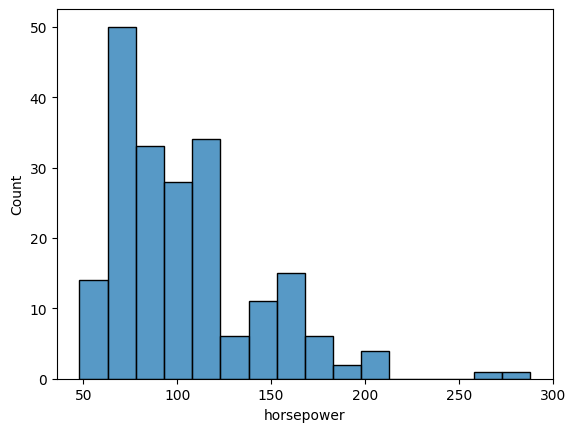

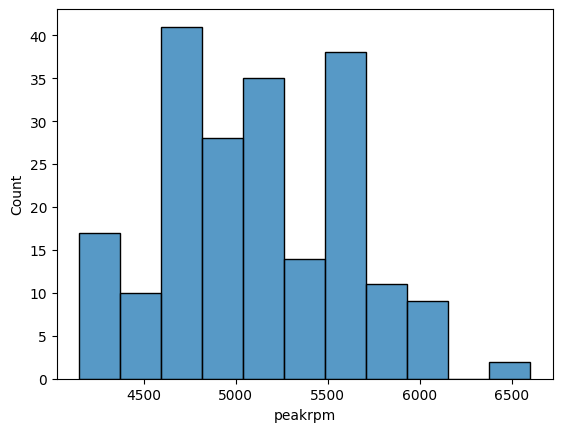

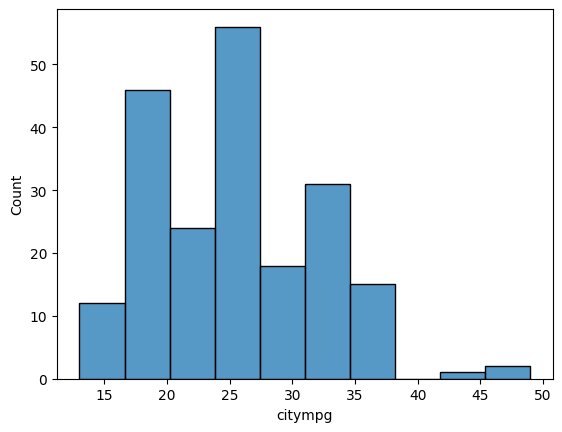

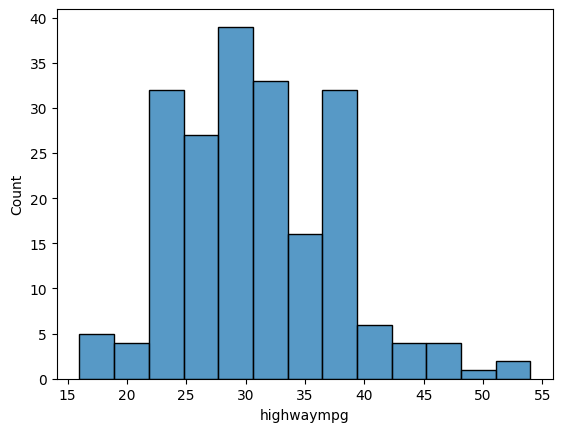

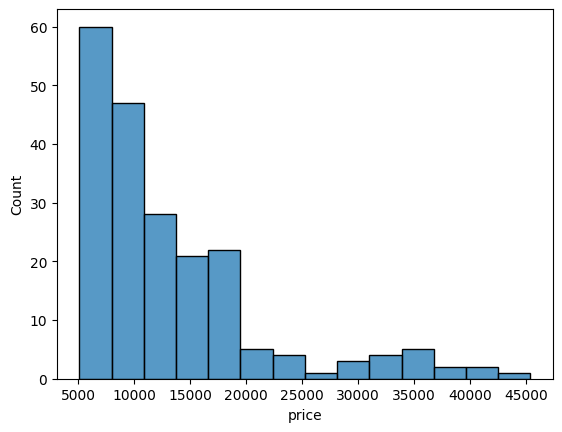

In [19]:
for i in num_col:
    sns.histplot(x=i,data=df)
    plt.show()  

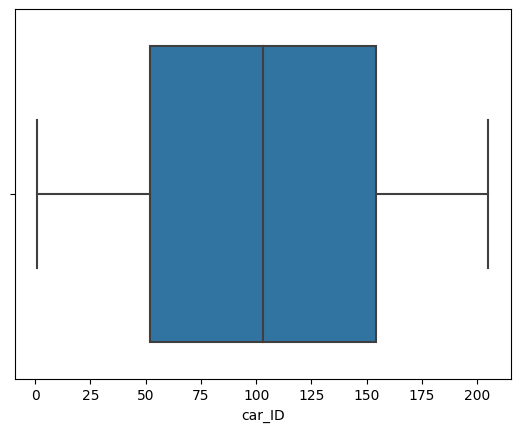

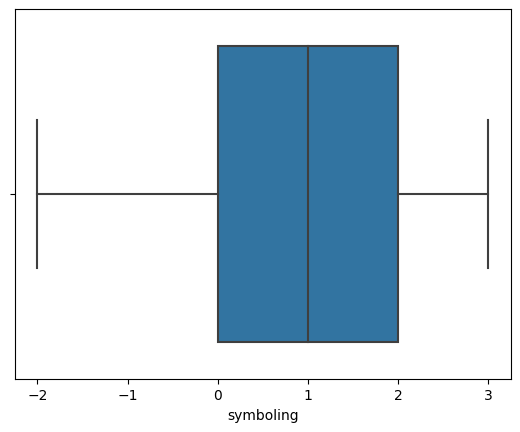

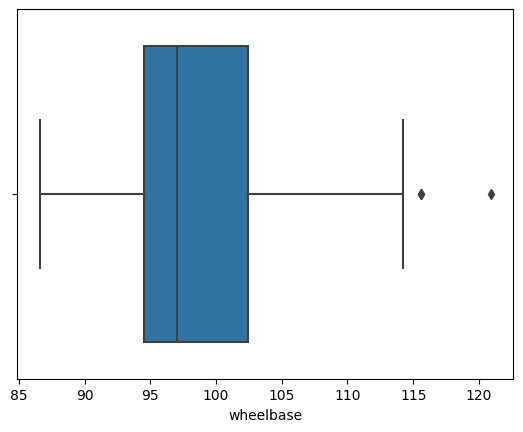

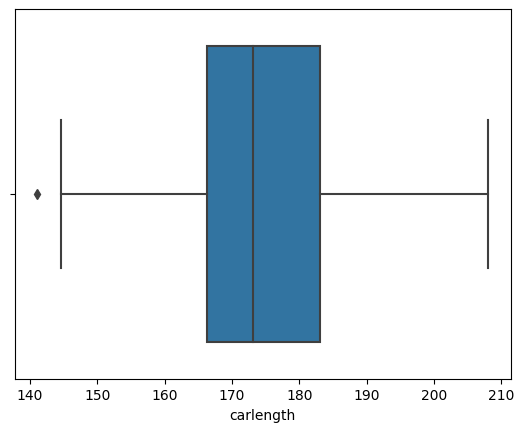

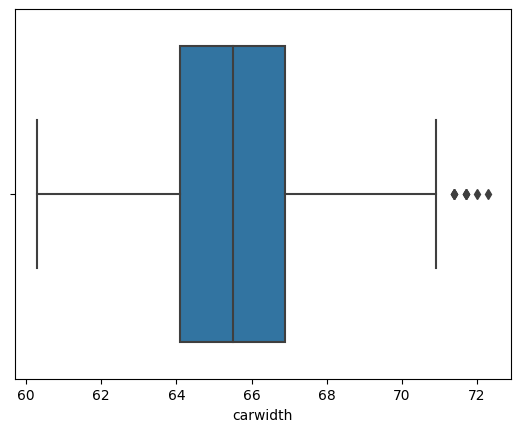

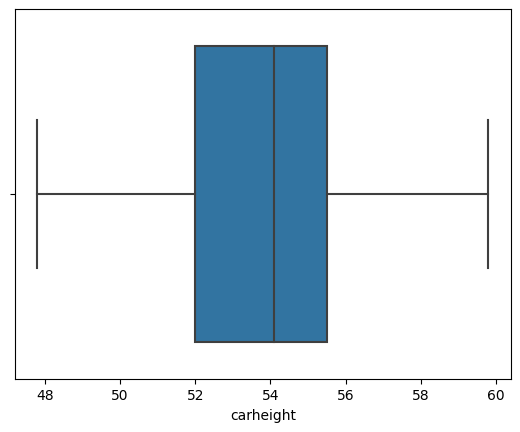

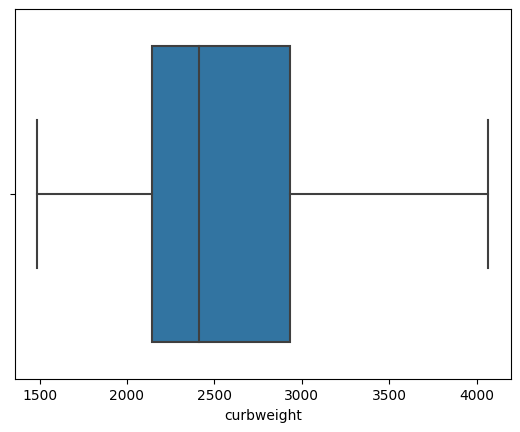

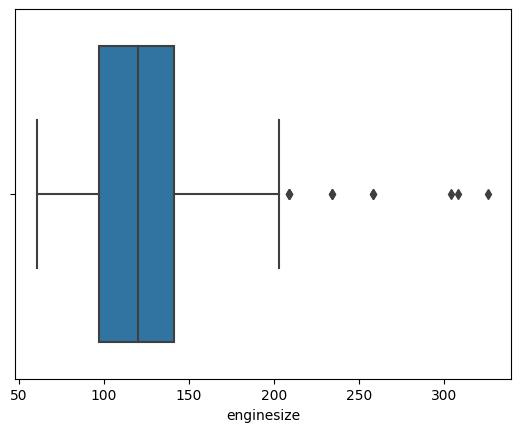

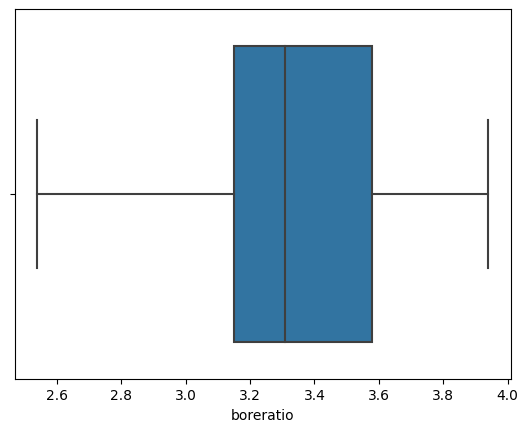

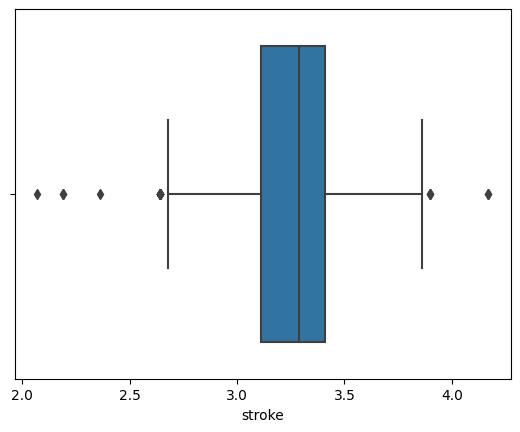

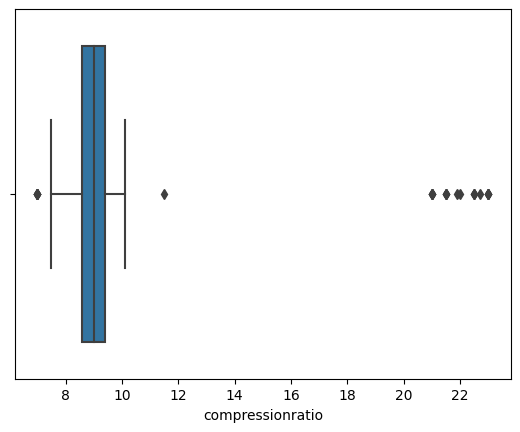

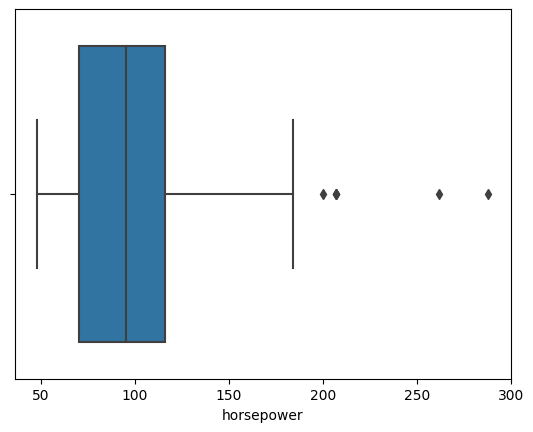

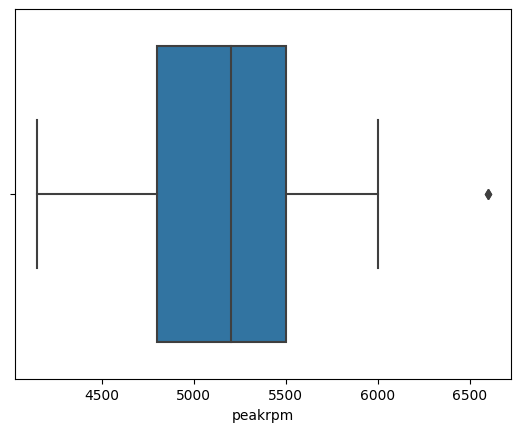

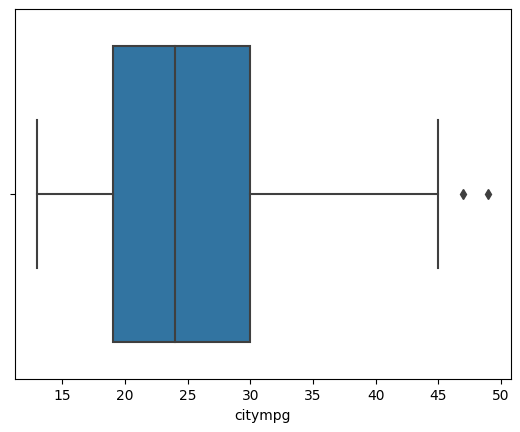

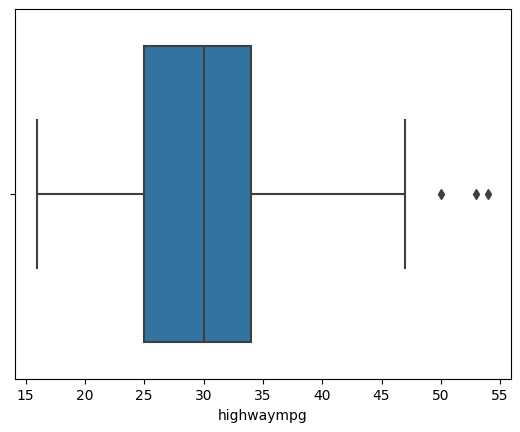

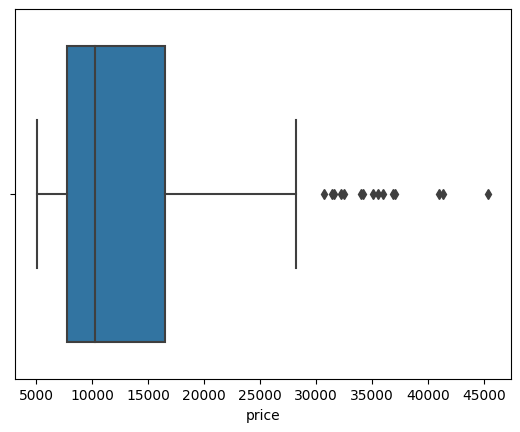

In [20]:
for i in num_col:
    sns.boxplot(x=i,data=df)
    plt.show()   

# Univariate Analysis(Categorical Data):

In [21]:
cat_col = df.select_dtypes(include = 'object').columns
cat_col

Index(['CompanyName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [22]:
df[cat_col].nunique()

CompanyName       22
fueltype           2
aspiration         2
doornumber         2
carbody            5
drivewheel         3
enginelocation     2
enginetype         7
cylindernumber     7
fuelsystem         8
dtype: int64

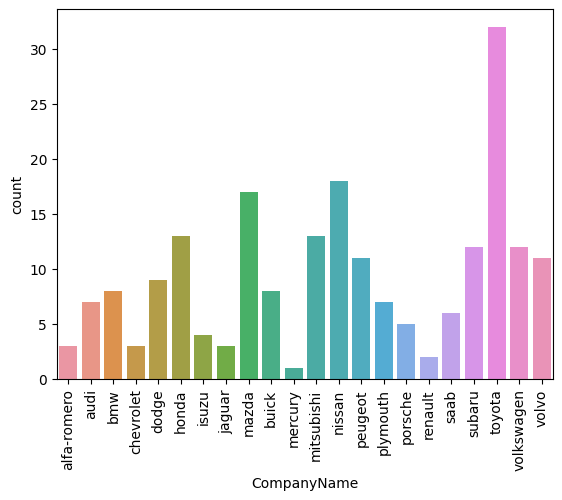

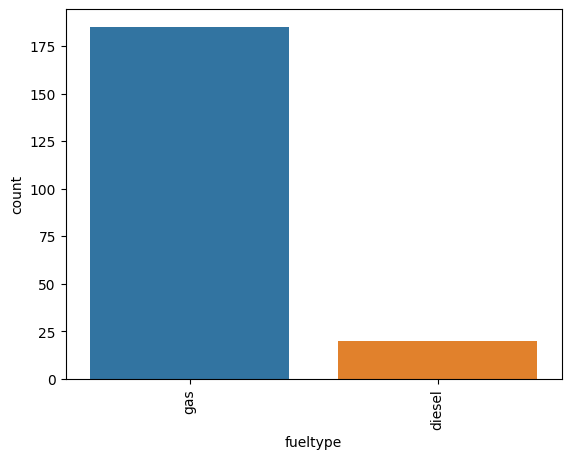

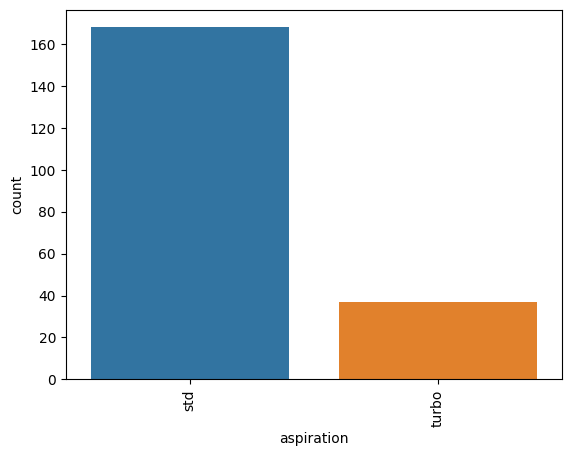

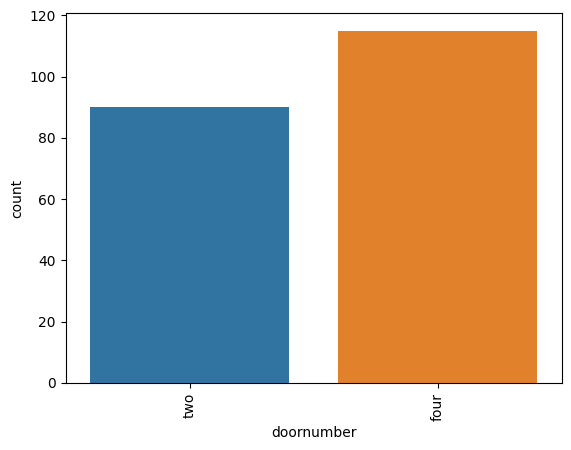

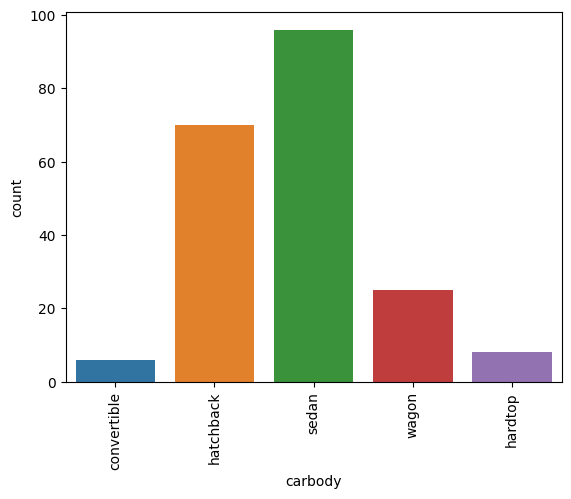

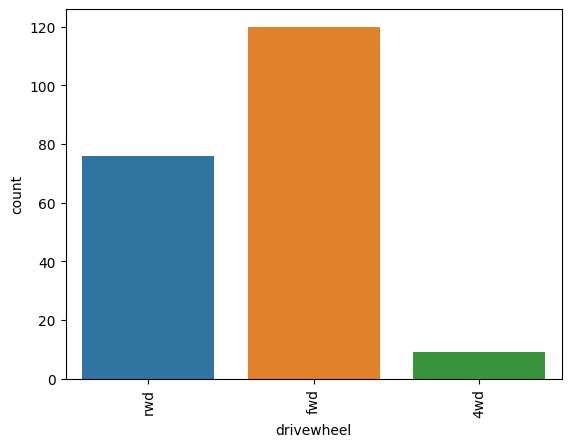

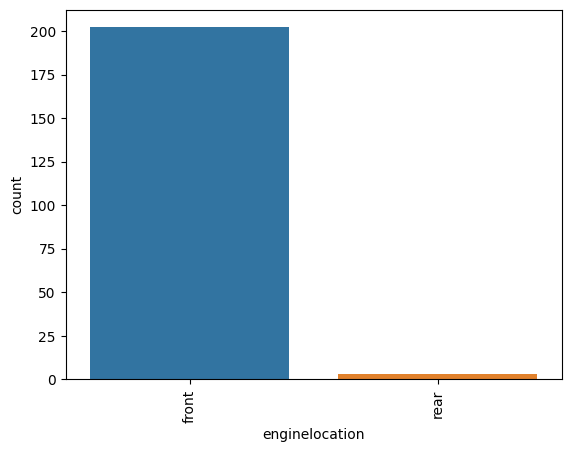

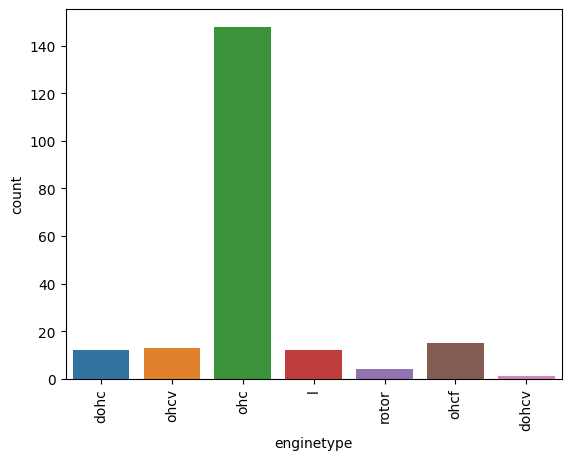

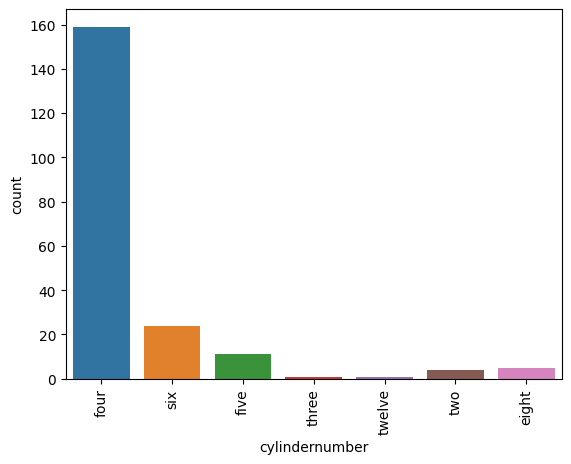

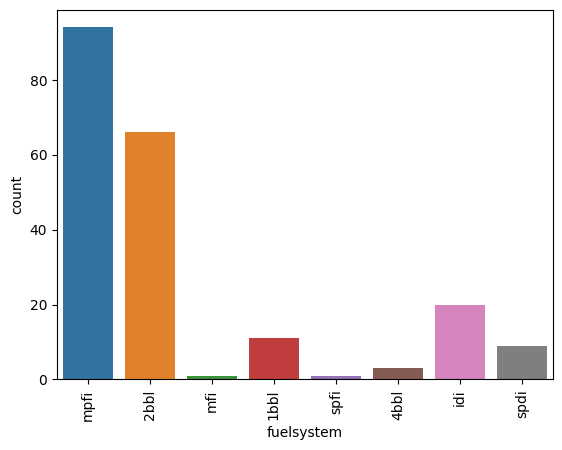

In [23]:
for i in cat_col: 
    sns.countplot(x=i,data=df)
    plt.xticks(rotation=90)
    plt.show() 

# Bivariate Analysis(Numerical Data):

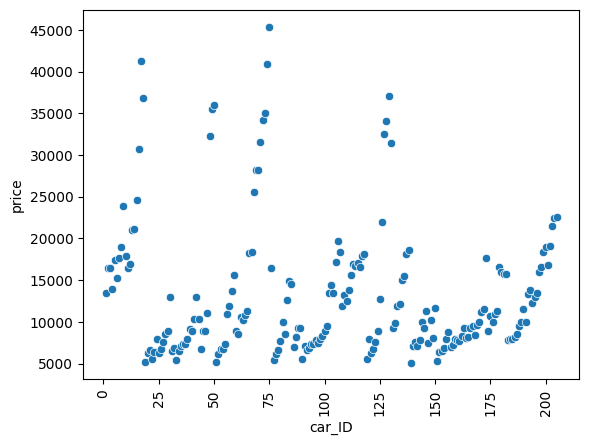

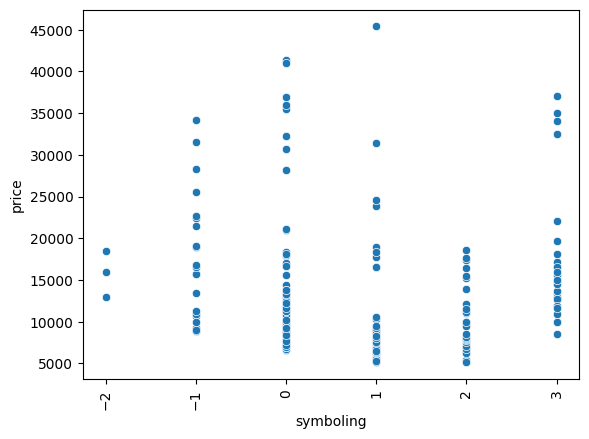

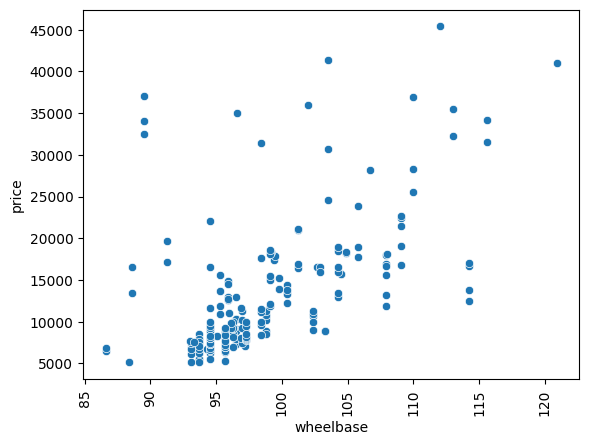

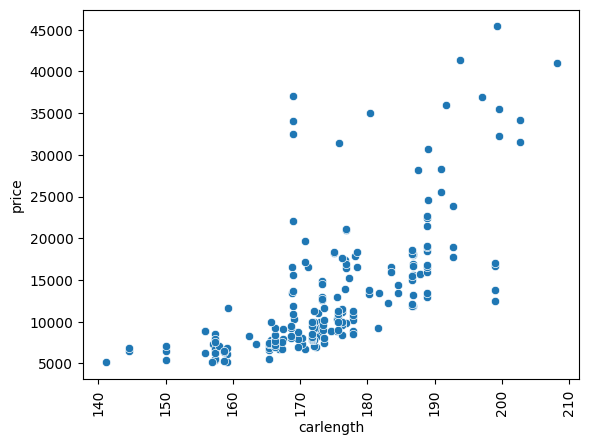

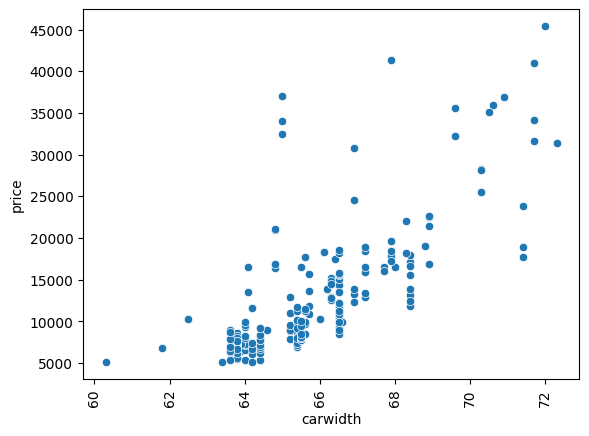

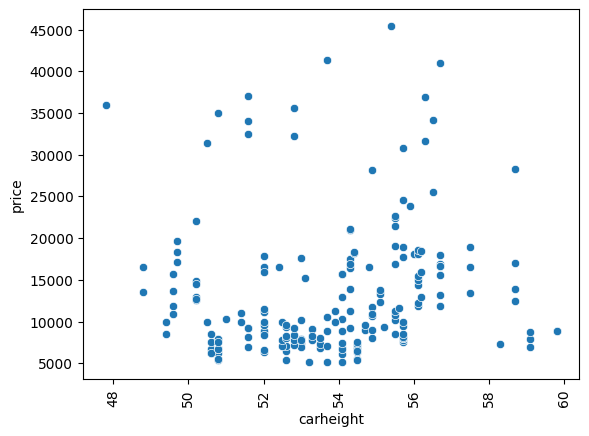

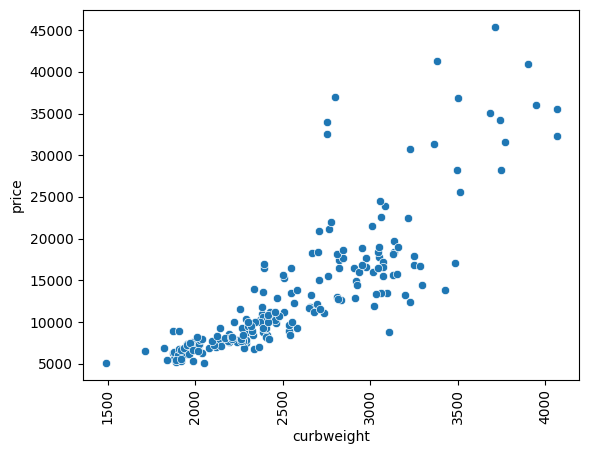

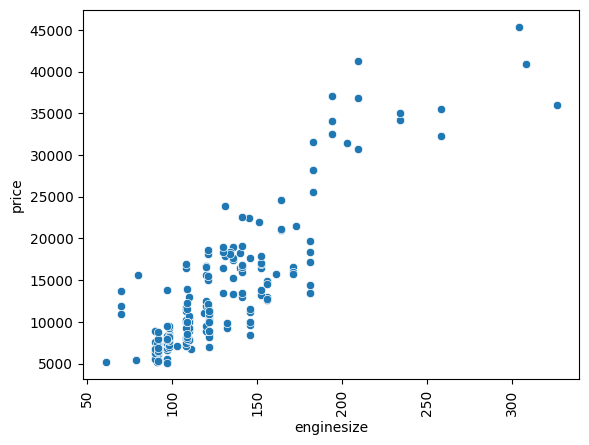

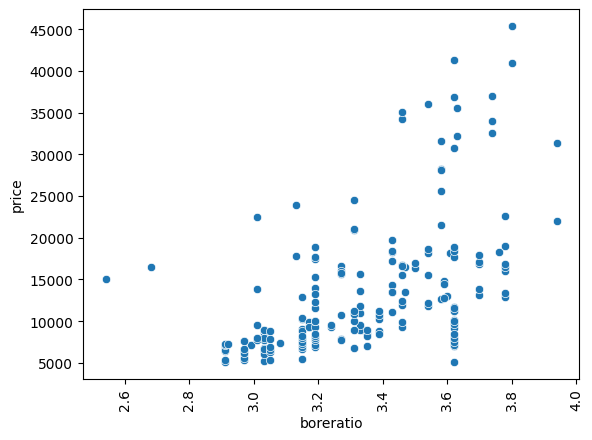

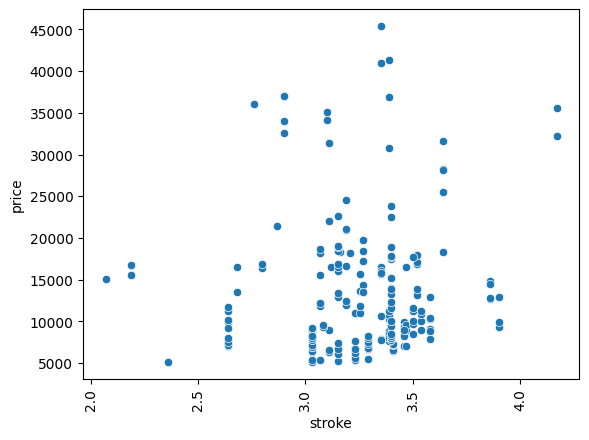

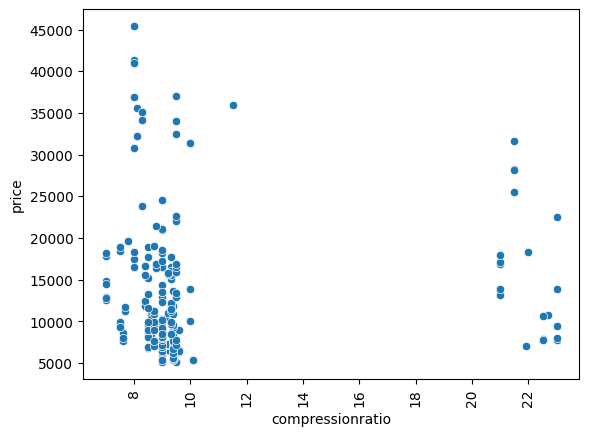

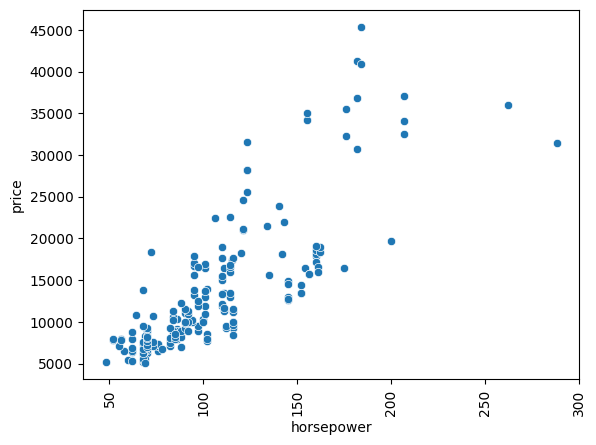

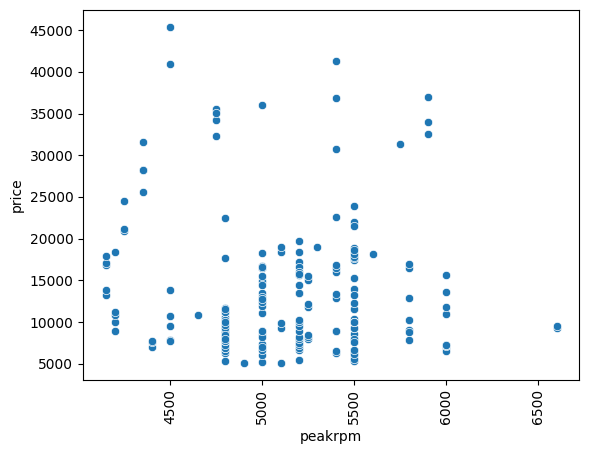

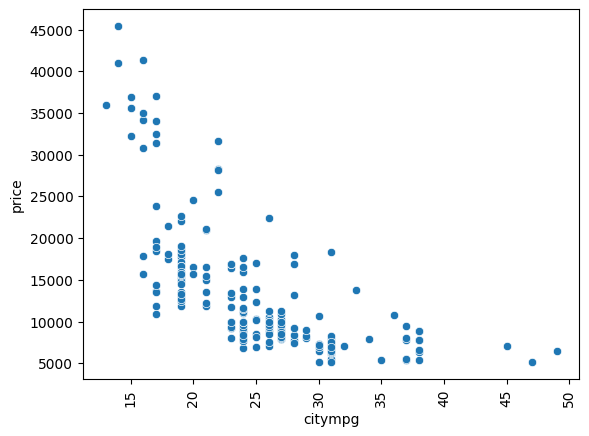

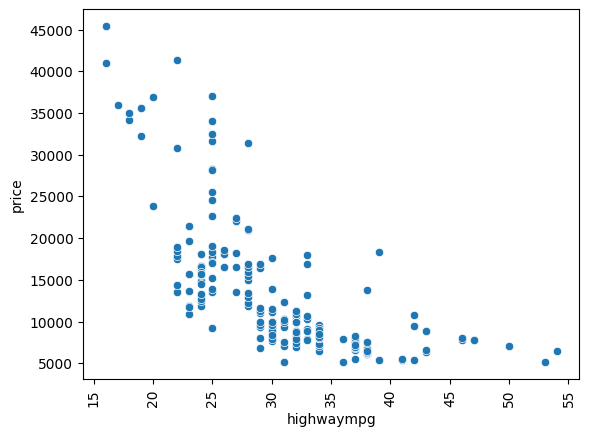

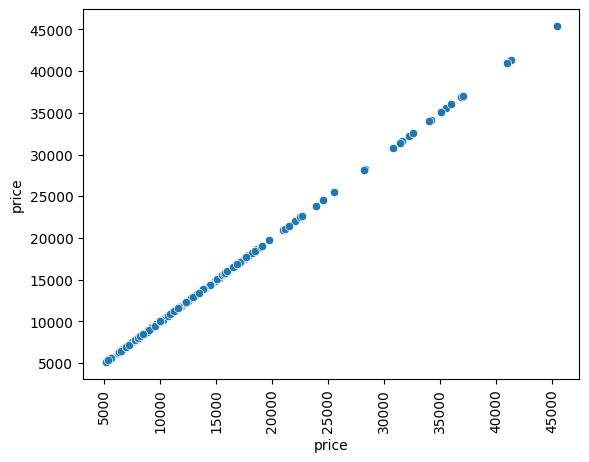

In [24]:
for i in num_col:        
    plt.xticks(rotation=90)
    sns.scatterplot(x=i,y='price',data=df)
    plt.show() 

# Bivariate Analysis(Categorical Data):

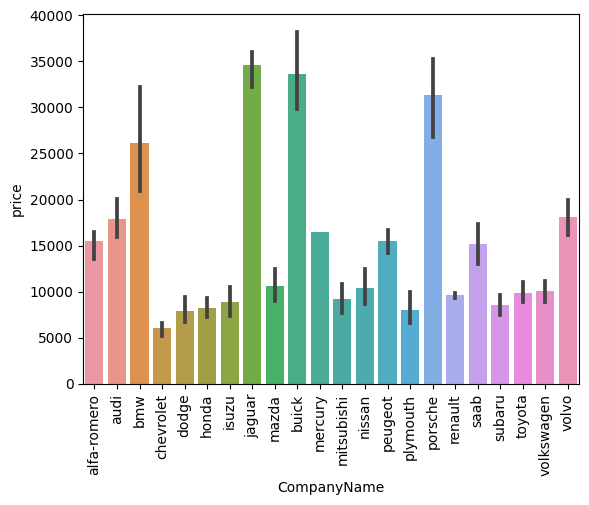

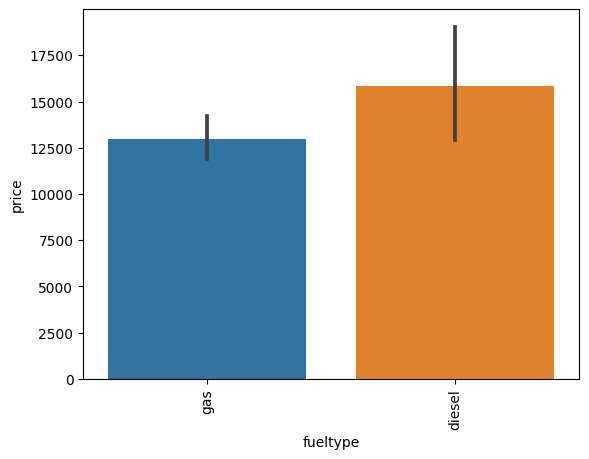

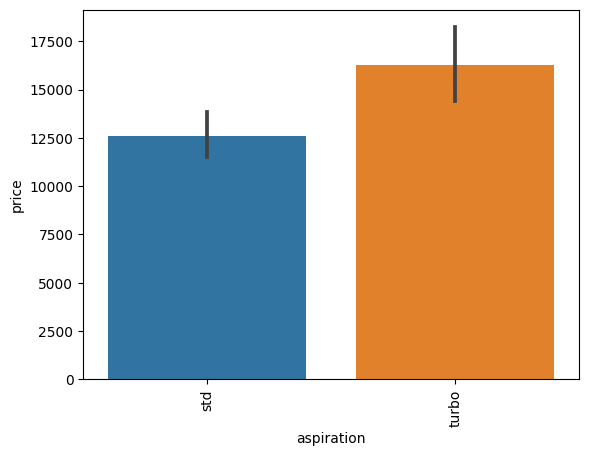

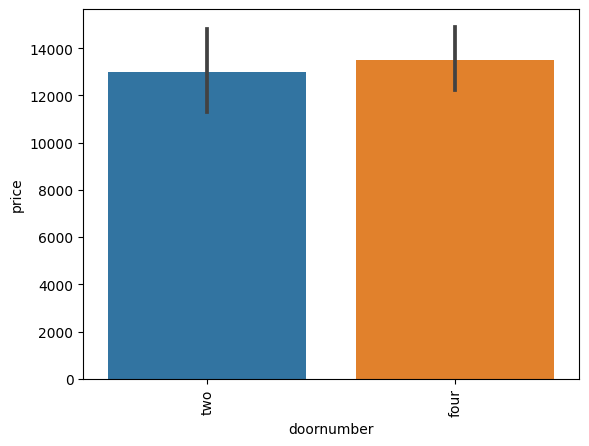

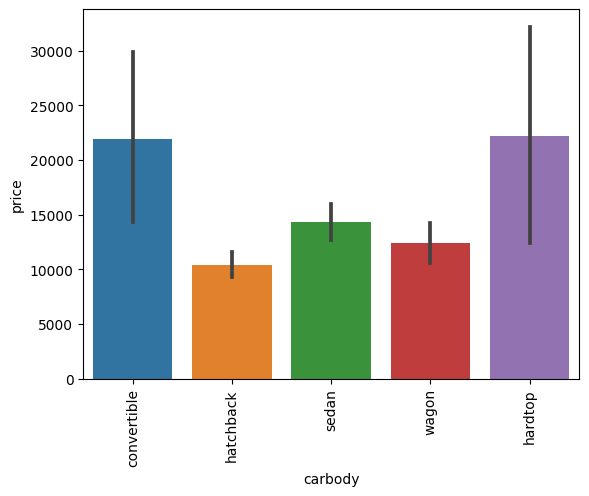

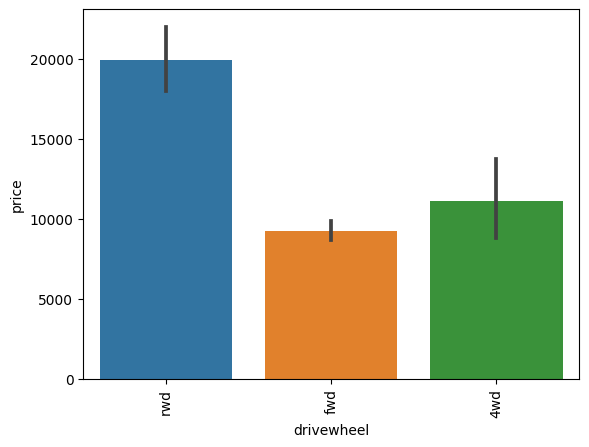

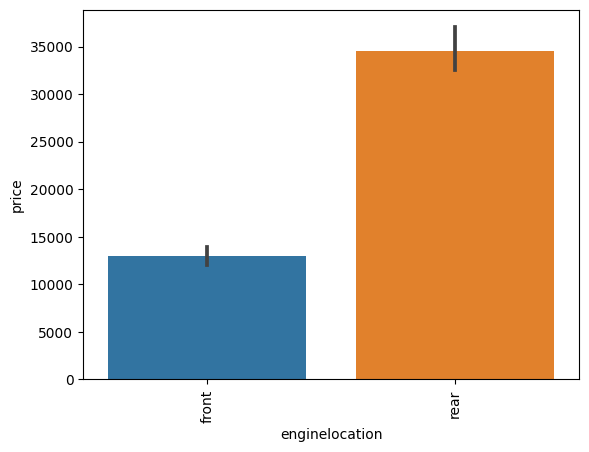

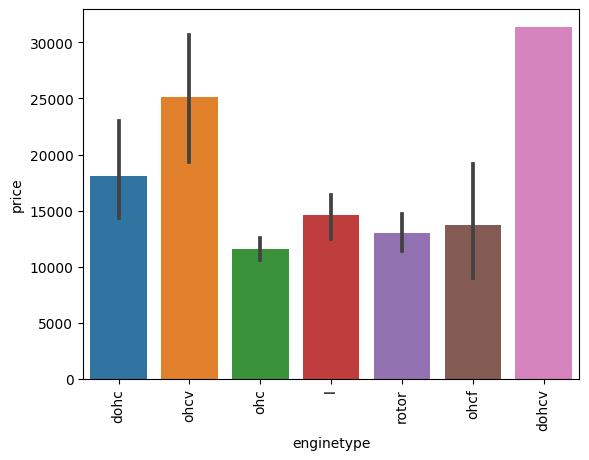

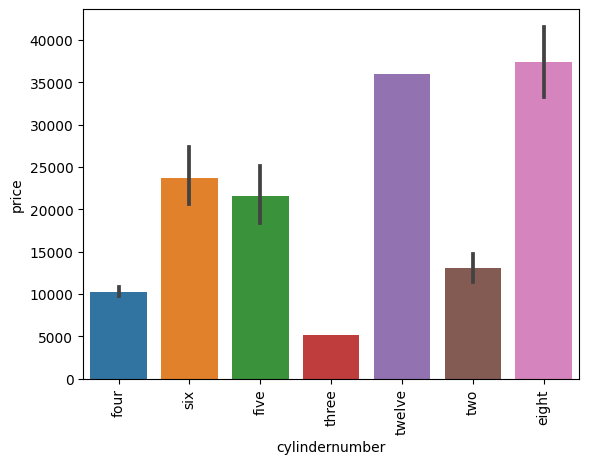

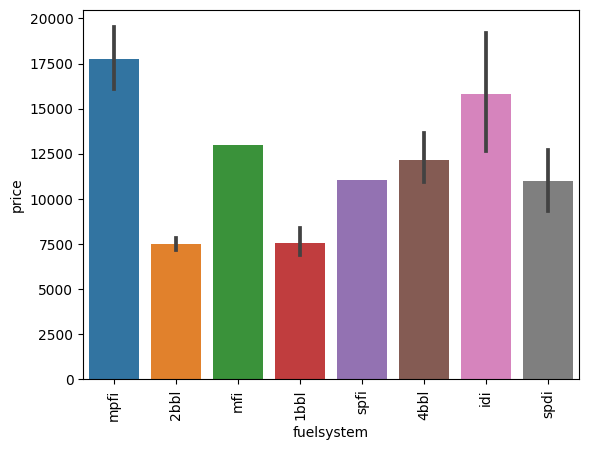

In [25]:
for i in cat_col:
    plt.xticks(rotation=90)
    sns.barplot(x=i,y='price',data=df)
    plt.show()   

# Correlation

<Axes: >

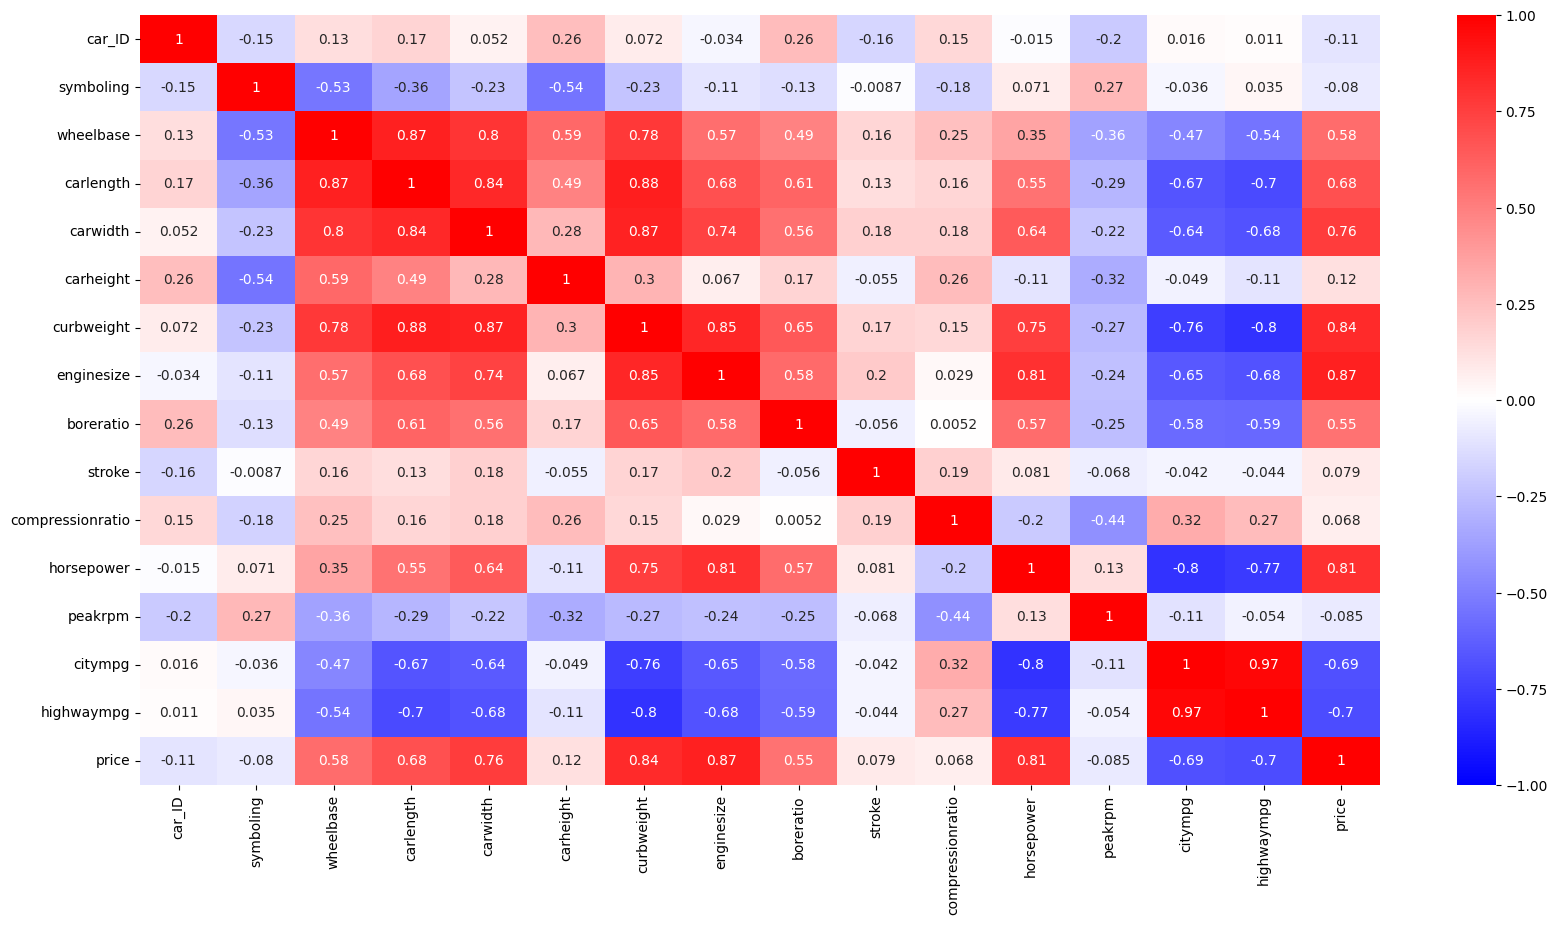

In [26]:
plt.figure(figsize=(20, 10))
sns.heatmap(df[num_col].corr(), cmap = 'bwr', vmin = -1, annot = True)

In [27]:
df[num_col].corr()['price'].sort_values()

highwaympg         -0.697599
citympg            -0.685751
car_ID             -0.109093
peakrpm            -0.085267
symboling          -0.079978
compressionratio    0.067984
stroke              0.079443
carheight           0.119336
boreratio           0.553173
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
horsepower          0.808139
curbweight          0.835305
enginesize          0.874145
price               1.000000
Name: price, dtype: float64

# Checking Skewness:

In [28]:
df[num_col].skew()

car_ID              0.000000
symboling           0.211072
wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginesize          1.947655
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
price               1.777678
dtype: float64

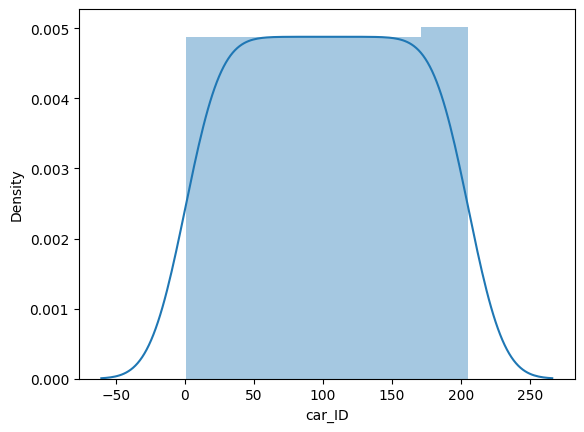

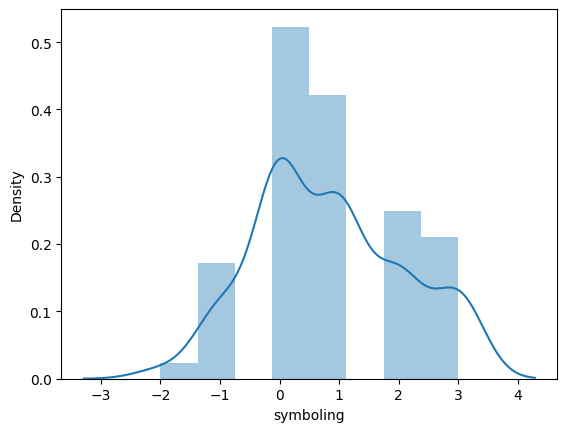

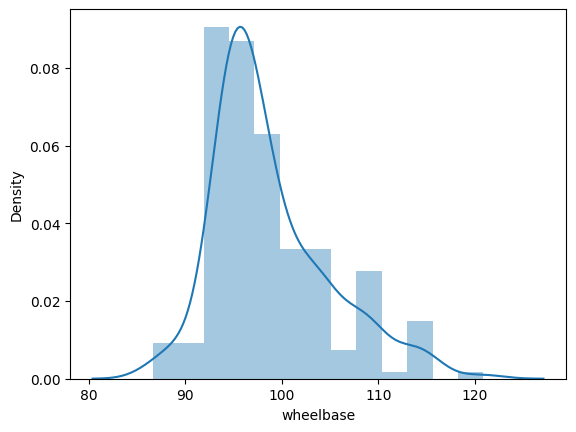

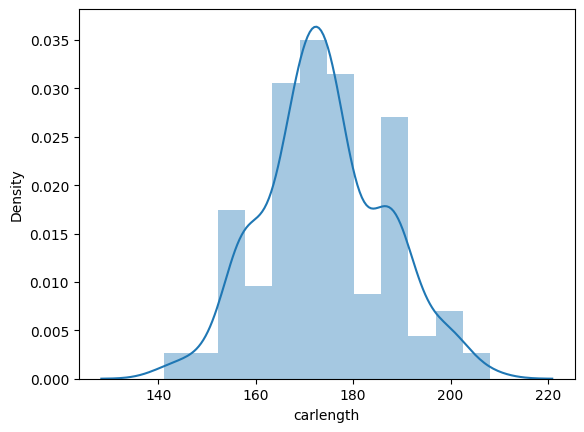

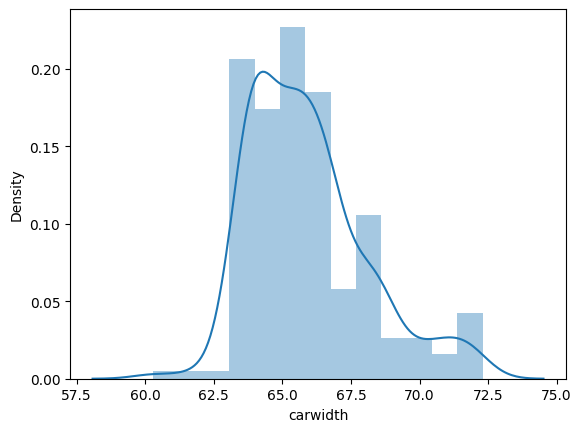

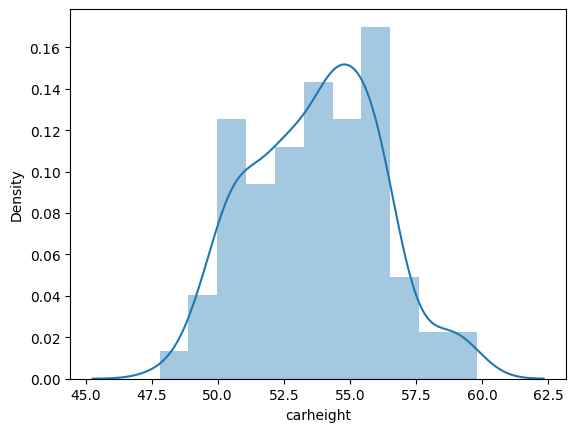

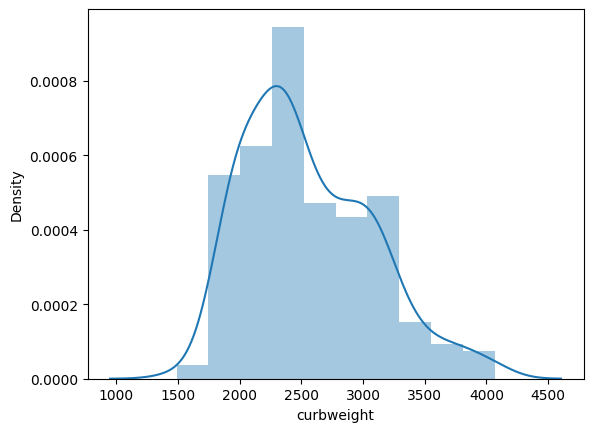

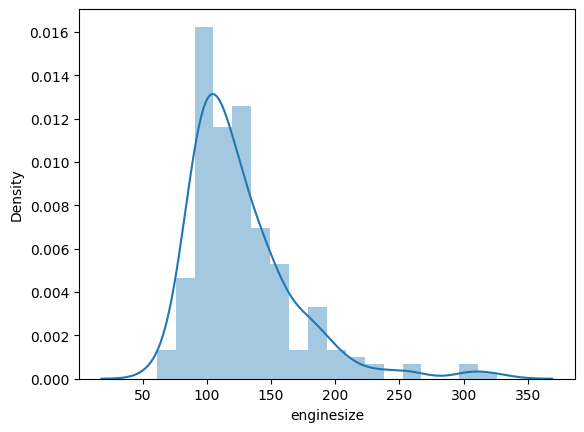

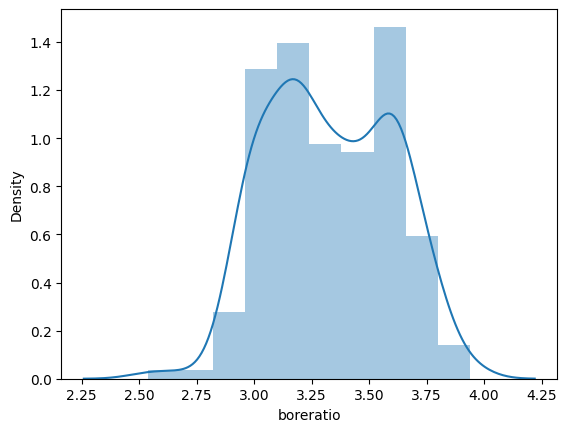

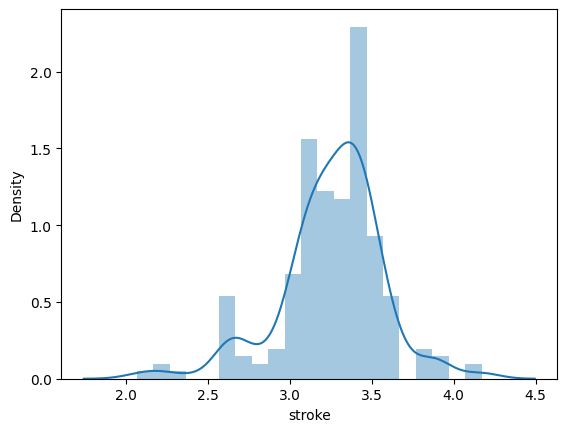

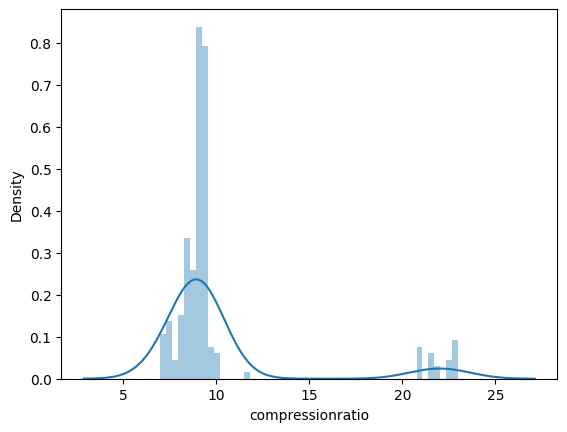

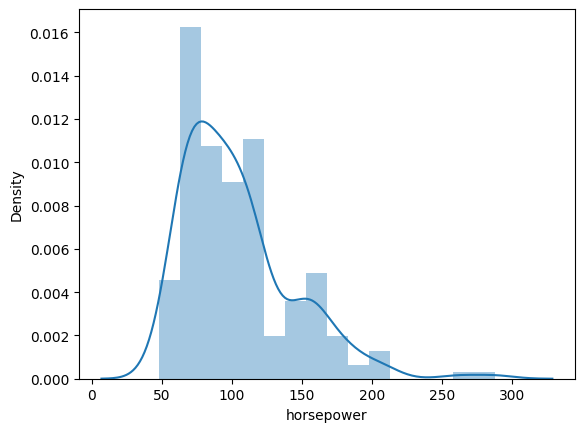

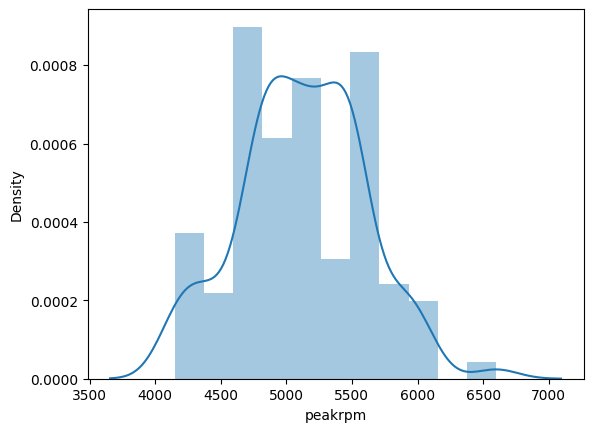

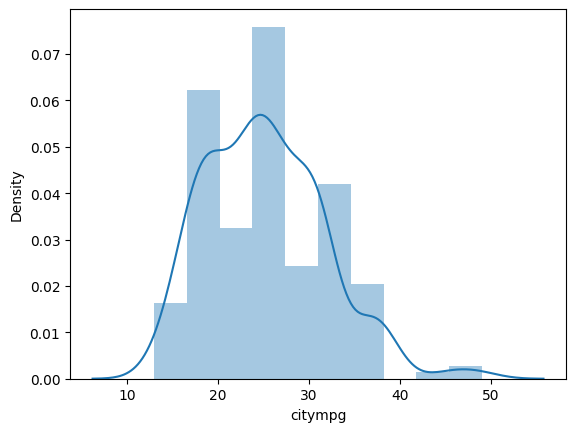

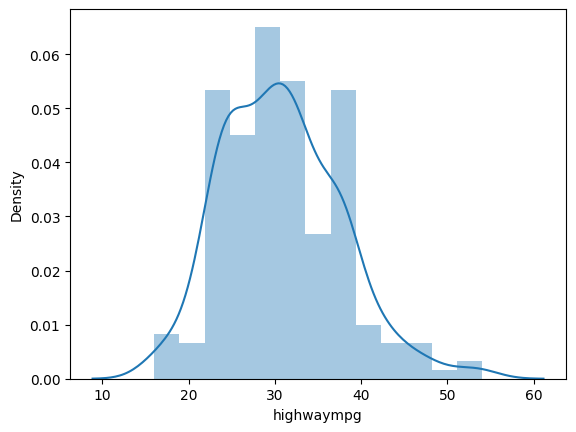

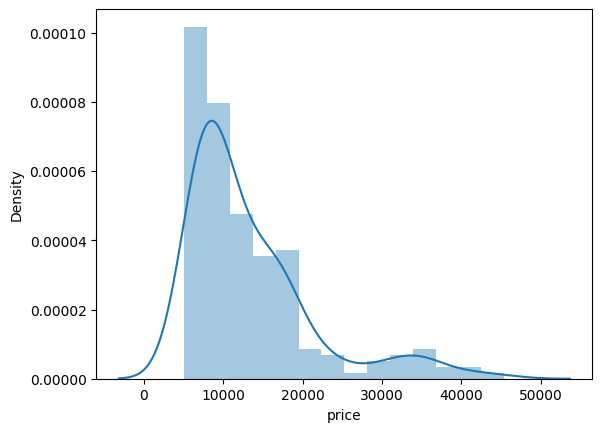

In [29]:
#Distribution plot
for i in num_col:
    sns.distplot(df[i])
    plt.show()

# Outliers Checking:

car_ID                 Axes(0.125,0.712609;0.168478x0.167391)
symboling           Axes(0.327174,0.712609;0.168478x0.167391)
wheelbase           Axes(0.529348,0.712609;0.168478x0.167391)
carlength           Axes(0.731522,0.712609;0.168478x0.167391)
carwidth               Axes(0.125,0.511739;0.168478x0.167391)
carheight           Axes(0.327174,0.511739;0.168478x0.167391)
curbweight          Axes(0.529348,0.511739;0.168478x0.167391)
enginesize          Axes(0.731522,0.511739;0.168478x0.167391)
boreratio               Axes(0.125,0.31087;0.168478x0.167391)
stroke               Axes(0.327174,0.31087;0.168478x0.167391)
compressionratio     Axes(0.529348,0.31087;0.168478x0.167391)
horsepower           Axes(0.731522,0.31087;0.168478x0.167391)
peakrpm                    Axes(0.125,0.11;0.168478x0.167391)
citympg                 Axes(0.327174,0.11;0.168478x0.167391)
highwaympg              Axes(0.529348,0.11;0.168478x0.167391)
price                   Axes(0.731522,0.11;0.168478x0.167391)
dtype: o

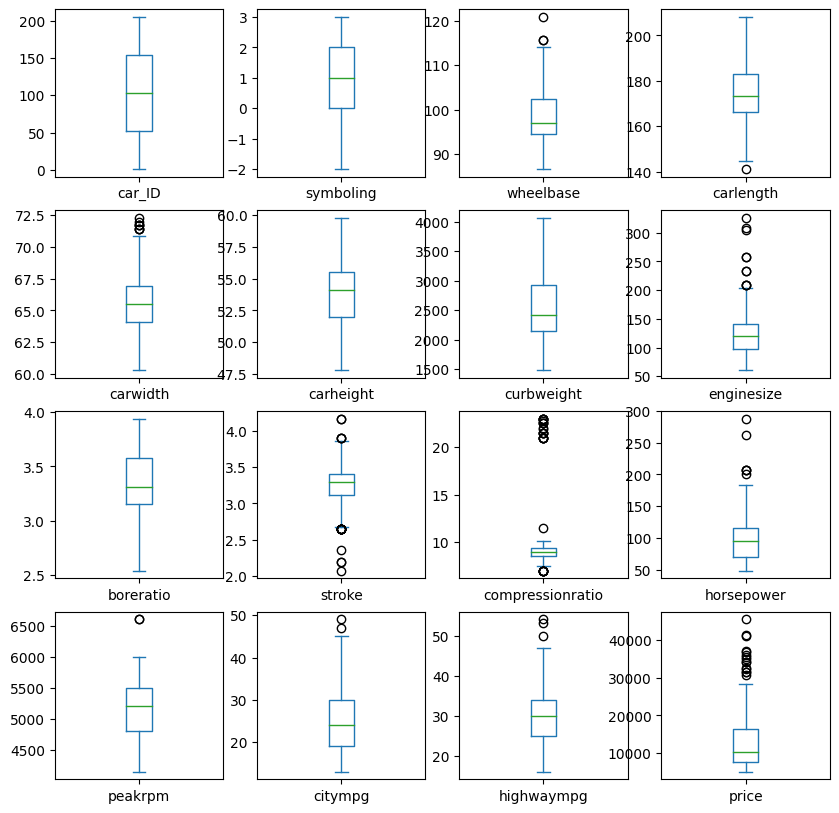

In [30]:
df[num_col].plot(kind='box',subplots=True,layout=(4,4),figsize=(10,10))

# Data Preprocessing

# Converting string data to numeric data

In [31]:
for i in df[cat_col]:
    print(i)
    print(df[i].unique())

CompanyName
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']
fueltype
['gas' 'diesel']
aspiration
['std' 'turbo']
doornumber
['two' 'four']
carbody
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel
['rwd' 'fwd' '4wd']
enginelocation
['front' 'rear']
enginetype
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
cylindernumber
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuelsystem
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


One-Hot Encoding
Feature 2 or 3 labels to avoid problems due to increased dimensionality. We will use Ordinal Encoder on the remaining features

In [32]:
df = pd.get_dummies(df,columns = ['fueltype', 'aspiration', 'doornumber', 'drivewheel', 'enginelocation'],drop_first = True,dtype=float)
df.head()

,car_ID,symboling,CompanyName,carbody,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,...,peakrpm,citympg,highwaympg,price,fueltype_gas,aspiration_turbo,doornumber_two,drivewheel_fwd,drivewheel_rwd,enginelocation_rear
0,1,3,alfa-romero,convertible,88.6,168.8,64.1,48.8,2548,dohc,...,5000,21,27,13495.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2,3,alfa-romero,convertible,88.6,168.8,64.1,48.8,2548,dohc,...,5000,21,27,16500.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3,1,alfa-romero,hatchback,94.5,171.2,65.5,52.4,2823,ohcv,...,5000,19,26,16500.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4,2,audi,sedan,99.8,176.6,66.2,54.3,2337,ohc,...,5500,24,30,13950.0,1.0,0.0,0.0,1.0,0.0,0.0
4,5,2,audi,sedan,99.4,176.6,66.4,54.3,2824,ohc,...,5500,18,22,17450.0,1.0,0.0,0.0,0.0,0.0,0.0


# Ordinal Encoding

In [33]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

encoder = OrdinalEncoder()
for i in df.select_dtypes(include = 'object').columns:
    df[i] = encoder.fit_transform(df[[i]])
df.head()

,car_ID,symboling,CompanyName,carbody,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,...,peakrpm,citympg,highwaympg,price,fueltype_gas,aspiration_turbo,doornumber_two,drivewheel_fwd,drivewheel_rwd,enginelocation_rear
0,1,3,0.0,0.0,88.6,168.8,64.1,48.8,2548,0.0,...,5000,21,27,13495.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2,3,0.0,0.0,88.6,168.8,64.1,48.8,2548,0.0,...,5000,21,27,16500.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3,1,0.0,2.0,94.5,171.2,65.5,52.4,2823,5.0,...,5000,19,26,16500.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4,2,1.0,3.0,99.8,176.6,66.2,54.3,2337,3.0,...,5500,24,30,13950.0,1.0,0.0,0.0,1.0,0.0,0.0
4,5,2,1.0,3.0,99.4,176.6,66.4,54.3,2824,3.0,...,5500,18,22,17450.0,1.0,0.0,0.0,0.0,0.0,0.0


# Data Cleaning:

# Outliers Treatment:

In [34]:
#using quantile method
for i in df.columns:
    ub=df[i].quantile(0.99)
    lb=df[i].quantile(0.01)
    print(i)
    print('upper bound:',ub)
    print('lower bound:',lb)
    df_new=df[(df[i]<=ub)&(df[i]>=lb)]
    print('\n')

car_ID
upper bound: 202.96
lower bound: 3.04


symboling
upper bound: 3.0
lower bound: -1.96


CompanyName
upper bound: 21.0
lower bound: 0.040000000000000036


carbody
upper bound: 4.0
lower bound: 0.0


wheelbase
upper bound: 115.54400000000001
lower bound: 88.408


carlength
upper bound: 202.48000000000002
lower bound: 144.816


carwidth
upper bound: 71.7
lower bound: 62.536


carheight
upper bound: 59.1
lower bound: 48.824


curbweight
upper bound: 3948.0000000000005
lower bound: 1819.72


enginetype
upper bound: 6.0
lower bound: 0.0


cylindernumber
upper bound: 6.0
lower bound: 0.0


enginesize
upper bound: 302.16000000000037
lower bound: 70.0


fuelsystem
upper bound: 6.0
lower bound: 0.0


boreratio
upper bound: 3.8
lower bound: 2.91


stroke
upper bound: 3.9
lower bound: 2.1968


compressionratio
upper bound: 23.0
lower bound: 7.0


horsepower
upper bound: 207.0
lower bound: 52.12


peakrpm
upper bound: 6000.0
lower bound: 4150.0


citympg
upper bound: 44.720000000000056
lower

In [35]:
df_new.shape[0]

202

In [36]:
data_loss=((df.shape[0]-df_new.shape[0])/df.shape[0])*100
data_loss

1.4634146341463417

In [37]:
#using zscore
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  0,   1,  16,  18,  18,  30,  30,  47,  48,  49,  49,  49,  55,
         56,  57,  58,  63,  63,  66,  67,  68,  69,  70,  72,  73,  73,
         73,  74,  74,  90,  90, 108, 110, 111, 112, 113, 114, 116, 126,
        127, 128, 128, 129, 134, 158, 158, 159, 159, 165, 166, 172, 174,
        174, 182, 182, 184, 184, 187, 187, 189, 192, 192, 203, 203],
       dtype=int64),
 array([ 3,  3, 20, 18, 19, 18, 19, 11, 11, 10, 11, 16, 10, 10, 10, 10, 15,
        21, 21, 21, 21, 21, 21,  3,  4, 11, 20, 11, 20, 18, 21, 21, 21, 14,
        21, 14, 21, 21, 26, 26,  3, 26, 16, 14, 15, 21, 15, 21, 17, 17,  3,
        15, 21, 15, 21, 15, 21, 15, 21,  3, 15, 21, 15, 21], dtype=int64))

In [38]:
df_new2=df[(z<3).all(axis=1)]
df_new2

,car_ID,symboling,CompanyName,carbody,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,...,peakrpm,citympg,highwaympg,price,fueltype_gas,aspiration_turbo,doornumber_two,drivewheel_fwd,drivewheel_rwd,enginelocation_rear
2,3,1,0.0,2.0,94.5,171.2,65.5,52.4,2823,5.0,...,5000,19,26,16500.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4,2,1.0,3.0,99.8,176.6,66.2,54.3,2337,3.0,...,5500,24,30,13950.0,1.0,0.0,0.0,1.0,0.0,0.0
4,5,2,1.0,3.0,99.4,176.6,66.4,54.3,2824,3.0,...,5500,18,22,17450.0,1.0,0.0,0.0,0.0,0.0,0.0
5,6,2,1.0,3.0,99.8,177.3,66.3,53.1,2507,3.0,...,5500,19,25,15250.0,1.0,0.0,1.0,1.0,0.0,0.0
6,7,1,1.0,3.0,105.8,192.7,71.4,55.7,2844,3.0,...,5500,19,25,17710.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,200,-1,21.0,4.0,104.3,188.8,67.2,57.5,3157,3.0,...,5100,17,22,18950.0,1.0,1.0,0.0,0.0,1.0,0.0
200,201,-1,21.0,3.0,109.1,188.8,68.9,55.5,2952,3.0,...,5400,23,28,16845.0,1.0,0.0,0.0,0.0,1.0,0.0
201,202,-1,21.0,3.0,109.1,188.8,68.8,55.5,3049,3.0,...,5300,19,25,19045.0,1.0,1.0,0.0,0.0,1.0,0.0
202,203,-1,21.0,3.0,109.1,188.8,68.9,55.5,3012,5.0,...,5500,18,23,21485.0,1.0,0.0,0.0,0.0,1.0,0.0


In [39]:
data_loss=((df.shape[0]-df_new2.shape[0])/df.shape[0])*100
data_loss

22.439024390243905

car_ID                 Axes(0.125,0.712609;0.168478x0.167391)
symboling           Axes(0.327174,0.712609;0.168478x0.167391)
wheelbase           Axes(0.529348,0.712609;0.168478x0.167391)
carlength           Axes(0.731522,0.712609;0.168478x0.167391)
carwidth               Axes(0.125,0.511739;0.168478x0.167391)
carheight           Axes(0.327174,0.511739;0.168478x0.167391)
curbweight          Axes(0.529348,0.511739;0.168478x0.167391)
enginesize          Axes(0.731522,0.511739;0.168478x0.167391)
boreratio               Axes(0.125,0.31087;0.168478x0.167391)
stroke               Axes(0.327174,0.31087;0.168478x0.167391)
compressionratio     Axes(0.529348,0.31087;0.168478x0.167391)
horsepower           Axes(0.731522,0.31087;0.168478x0.167391)
peakrpm                    Axes(0.125,0.11;0.168478x0.167391)
citympg                 Axes(0.327174,0.11;0.168478x0.167391)
highwaympg              Axes(0.529348,0.11;0.168478x0.167391)
price                   Axes(0.731522,0.11;0.168478x0.167391)
dtype: o

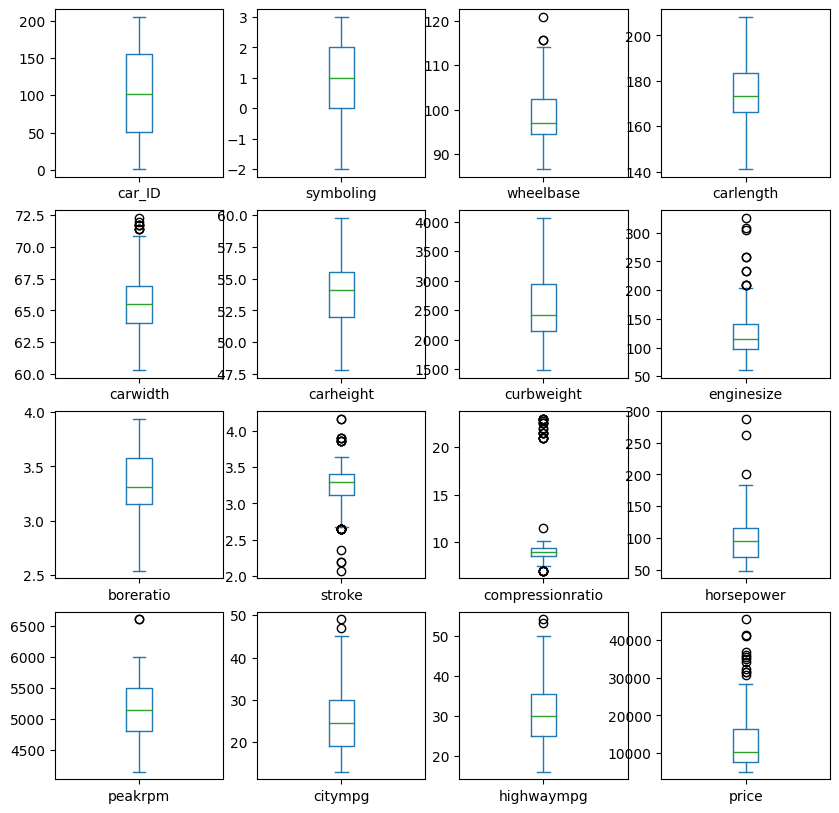

In [40]:
df_new[num_col].plot(kind='box',subplots=True,layout=(4,4),figsize=(10,10))

car_ID                 Axes(0.125,0.712609;0.168478x0.167391)
symboling           Axes(0.327174,0.712609;0.168478x0.167391)
wheelbase           Axes(0.529348,0.712609;0.168478x0.167391)
carlength           Axes(0.731522,0.712609;0.168478x0.167391)
carwidth               Axes(0.125,0.511739;0.168478x0.167391)
carheight           Axes(0.327174,0.511739;0.168478x0.167391)
curbweight          Axes(0.529348,0.511739;0.168478x0.167391)
enginesize          Axes(0.731522,0.511739;0.168478x0.167391)
boreratio               Axes(0.125,0.31087;0.168478x0.167391)
stroke               Axes(0.327174,0.31087;0.168478x0.167391)
compressionratio     Axes(0.529348,0.31087;0.168478x0.167391)
horsepower           Axes(0.731522,0.31087;0.168478x0.167391)
peakrpm                    Axes(0.125,0.11;0.168478x0.167391)
citympg                 Axes(0.327174,0.11;0.168478x0.167391)
highwaympg              Axes(0.529348,0.11;0.168478x0.167391)
price                   Axes(0.731522,0.11;0.168478x0.167391)
dtype: o

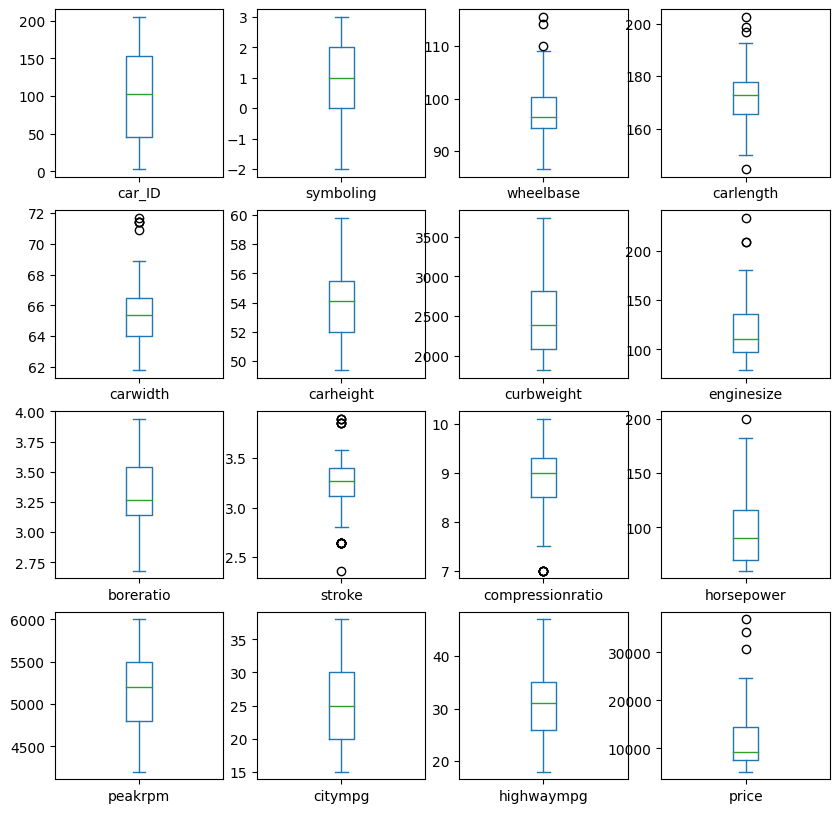

In [41]:
df_new2[num_col].plot(kind='box',subplots=True,layout=(4,4),figsize=(10,10))

Since zcore seems to be more effective in capturing the outliers. We decide to go with the zscore approach to drop outliers

In [42]:
df=df_new2

# Multi Collinearity Treatment

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [44]:
#independent column
x=df.drop('price', axis = 1)

In [45]:
#target
y=df['price']

In [46]:
def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['features']=x.columns
    print(vif)

In [47]:
vif_calc()

     VIF Factor             features
0    178.562289               car_ID
1      3.104270            symboling
2    190.242526          CompanyName
3      2.847570              carbody
4     12.555166            wheelbase
5     11.482868            carlength
6      6.643052             carwidth
7      3.165901            carheight
8     18.804814           curbweight
9      2.225104           enginetype
10     2.775393       cylindernumber
11    19.331245           enginesize
12     3.525917           fuelsystem
13     4.686484            boreratio
14     2.641852               stroke
15     3.944019     compressionratio
16    19.542345           horsepower
17     2.079544              peakrpm
18    29.551455              citympg
19    27.864416           highwaympg
20  8176.208383         fueltype_gas
21     4.572588     aspiration_turbo
22     2.933070       doornumber_two
23     7.889507       drivewheel_fwd
24     8.095207       drivewheel_rwd
25          NaN  enginelocation_rear


1.carheight is very less correlated with the target

2.citympg and highwaympg has high vif value and they are highly collinear among themself and negatively collinear with targer price.

3.Symboling and CarId has not much impact on carprice.

4.Stroke,compression ration,peakrpm very less correlation(close to zero) with the target.

5.Company name is not important feature in terms of price.

We decide to drop features with high VIF,low collinearity with price.

In [48]:
df.drop(['highwaympg','citympg','car_ID','symboling','CompanyName','compressionratio','stroke','peakrpm','carheight'],axis=1,inplace=True)
df

,carbody,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,price,fueltype_gas,aspiration_turbo,doornumber_two,drivewheel_fwd,drivewheel_rwd,enginelocation_rear
2,2.0,94.5,171.2,65.5,2823,5.0,3.0,152,5.0,2.68,154,16500.0,1.0,0.0,1.0,0.0,1.0,0.0
3,3.0,99.8,176.6,66.2,2337,3.0,2.0,109,5.0,3.19,102,13950.0,1.0,0.0,0.0,1.0,0.0,0.0
4,3.0,99.4,176.6,66.4,2824,3.0,1.0,136,5.0,3.19,115,17450.0,1.0,0.0,0.0,0.0,0.0,0.0
5,3.0,99.8,177.3,66.3,2507,3.0,1.0,136,5.0,3.19,110,15250.0,1.0,0.0,1.0,1.0,0.0,0.0
6,3.0,105.8,192.7,71.4,2844,3.0,1.0,136,5.0,3.19,110,17710.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,4.0,104.3,188.8,67.2,3157,3.0,2.0,130,5.0,3.62,162,18950.0,1.0,1.0,0.0,0.0,1.0,0.0
200,3.0,109.1,188.8,68.9,2952,3.0,2.0,141,5.0,3.78,114,16845.0,1.0,0.0,0.0,0.0,1.0,0.0
201,3.0,109.1,188.8,68.8,3049,3.0,2.0,141,5.0,3.78,160,19045.0,1.0,1.0,0.0,0.0,1.0,0.0
202,3.0,109.1,188.8,68.9,3012,5.0,3.0,173,5.0,3.58,134,21485.0,1.0,0.0,0.0,0.0,1.0,0.0


# Seperating the data into features and target

In [49]:
#independent column
x=df.drop('price', axis = 1)

In [50]:
#target
y=df['price']

# Transforming Data to remove skewness:

In [51]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-9.71442828e-01, -4.13558077e-15, -1.07831272e-01, ...,
        -1.43446586e+00,  1.64245987e+00,  0.00000000e+00],
       [ 4.31065988e-01,  3.02535774e-15,  3.75253855e-01, ...,
         6.97123596e-01, -6.08842882e-01,  0.00000000e+00],
       [ 4.31065988e-01,  2.58126853e-15,  3.75253855e-01, ...,
        -1.43446586e+00, -6.08842882e-01,  0.00000000e+00],
       ...,
       [ 4.31065988e-01,  1.04916076e-14,  1.43926417e+00, ...,
        -1.43446586e+00,  1.64245987e+00,  0.00000000e+00],
       [ 4.31065988e-01,  1.04916076e-14,  1.43926417e+00, ...,
        -1.43446586e+00,  1.64245987e+00,  0.00000000e+00],
       [ 4.31065988e-01,  1.04916076e-14,  1.43926417e+00, ...,
        -1.43446586e+00,  1.64245987e+00,  0.00000000e+00]])

In [52]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.97144283, -0.78012417, -0.10783127, ..., -1.43446586,
         1.64245987,  0.        ],
       [ 0.43106599,  0.55474918,  0.37525385, ...,  0.6971236 ,
        -0.60884288,  0.        ],
       [ 0.43106599,  0.47196633,  0.37525385, ..., -1.43446586,
        -0.60884288,  0.        ],
       ...,
       [ 0.43106599,  1.94653572,  1.43926417, ..., -1.43446586,
         1.64245987,  0.        ],
       [ 0.43106599,  1.94653572,  1.43926417, ..., -1.43446586,
         1.64245987,  0.        ],
       [ 0.43106599,  1.94653572,  1.43926417, ..., -1.43446586,
         1.64245987,  0.        ]])

# Since our outcome has continuous variable we will use regression model

# Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=100)
lr.fit(x_train,y_train)
test_pred=lr.predict(x_test)
train_pred=lr.predict(x_train)
print('testing score :',r2_score(y_test,test_pred))
print('training score :',r2_score(y_train,train_pred))
print('Error:')
print('Mean absolue error:',mean_absolute_error(y_test,test_pred))
print('Mean squared error:',mean_squared_error(y_test,test_pred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,test_pred)))

testing score : 0.7193677841229476
training score : 0.7647229941387714
Error:
Mean absolue error: 2023.2976949407566
Mean squared error: 6797245.425371517
Root Mean squared error: 2607.1527430074975


In [77]:
from sklearn.linear_model import Ridge
rg=Ridge(alpha=18)
rg.fit(x_train,y_train)
rgpred=rg.predict(x_test)
rg.score(x_train,y_train)
cv_score=cross_val_score(rg,x,y,cv=4)
cv_mean=cv_score.mean()
print('testing score :',r2_score(y_test,rgpred))
print('training score :',rg.score(x_train,y_train))
print('The CV score is:',cv_mean)
print('Error:')
print('Mean absolue error:',mean_absolute_error(y_test,rgpred))
print('Mean squared error:',mean_squared_error(y_test,rgpred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,rgpred)))

testing score : 0.7503673855752903
training score : 0.7532783531328143
The CV score is: 0.4906330676677744
Error:
Mean absolue error: 1838.6260796344206
Mean squared error: 6046398.27654456
Root Mean squared error: 2458.9425118421454


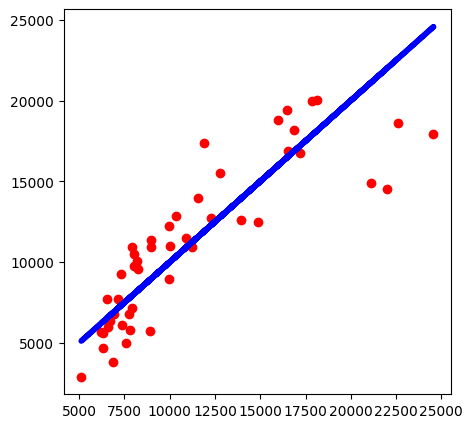

In [54]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,test_pred,color='r')
plt.plot(y_test,y_test,color='b',linewidth='4')
plt.show()

Decision Tree Regressor

In [55]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtrpred=dtr.predict(x_test)
dtr.score(x_train,y_train)
cv_score=cross_val_score(dtr,x,y,cv=4)
cv_mean=cv_score.mean()
print('testing score :',r2_score(y_test,dtrpred))
print('training score :',dtr.score(x_train,y_train))
print('The CV score is:',cv_mean)
print('Error:')
print('Mean absolue error:',mean_absolute_error(y_test,dtrpred))
print('Mean squared error:',mean_squared_error(y_test,dtrpred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,dtrpred)))

testing score : 0.5867877199022956
training score : 0.9989689437436474
The CV score is: 0.4630367381787497
Error:
Mean absolue error: 1820.6180625
Mean squared error: 10008491.975247687
Root Mean squared error: 3163.620074415967


In [56]:
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
svr=SVR()                         
svr.fit(x_train,y_train)
svrpred=svr.predict(x_test)
svr.score(x_train,y_train) 
cv_score=cross_val_score(svr,x,y,cv=4)
cv_mean=cv_score.mean()
print('The CV score is:',cv_mean)
print('testing score :',r2_score(y_test,svrpred))
print('training score :',svr.score(x_train,y_train))
print('Error:')
print('Mean absolue error:',mean_absolute_error(y_test,svrpred))
print('Mean squared error:',mean_squared_error(y_test,svrpred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,svrpred)))

The CV score is: -0.23598431119739388
testing score : -0.1490899533638863
training score : -0.14541790434332724
Error:
Mean absolue error: 3791.2744315473296
Mean squared error: 27832322.83019482
Root Mean squared error: 5275.6348272217265


In [57]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
knrpred=knr.predict(x_test)
knr.score(x_train,y_train)
cv_score=cross_val_score(knr,x,y,cv=4)
cv_mean=cv_score.mean()
print('The CV score is:',cv_mean)
print('testing score :',r2_score(y_test,knrpred))
print('training score :',knr.score(x_train,y_train))
print('Error:')
print('Mean absolue error:',mean_absolute_error(y_test,knrpred))
print('Mean squared error:',mean_squared_error(y_test,knrpred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,knrpred)))

The CV score is: 0.515333389135931
testing score : 0.8043751150902649
training score : 0.8227962841970766
Error:
Mean absolue error: 1325.5513958333333
Mean squared error: 4738266.951589354
Root Mean squared error: 2176.7560615717493


In [58]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()     
rf.fit(x_train,y_train)
rfpred=rf.predict(x_test)
rf.score(x_train,y_train)
cv_score=cross_val_score(rf,x,y,cv=4)
cv_mean=cv_score.mean()
print('The CV score is:',cv_mean)
print('testing score :',r2_score(y_test,rfpred))
print('training score :',rf.score(x_train,y_train))
print('Error:')
print('Mean absolue error:',mean_absolute_error(y_test,rfpred))
print('Mean squared error:',mean_squared_error(y_test,rfpred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,rfpred)))

The CV score is: 0.6594907753336359
testing score : 0.8156429444938474
training score : 0.9764110790630068
Error:
Mean absolue error: 1385.4933171296298
Mean squared error: 4465346.746658488
Root Mean squared error: 2113.136707990869


In [59]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor(n_estimators=300)      
ad.fit(x_train,y_train)
adpred=ad.predict(x_test)
ad.score(x_train,y_train)
ad.score(x_train,y_train)
cv_score=cross_val_score(ad,x,y,cv=4)
cv_mean=cv_score.mean()
print('The CV score is:',cv_mean)
print('testing score :',r2_score(y_test,adpred))
print('training score :',ad.score(x_train,y_train))
print('Error:')
print('Mean absolue error:',mean_absolute_error(y_test,adpred))
print('Mean squared error:',mean_squared_error(y_test,adpred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,adpred)))

The CV score is: 0.6994188946426739
testing score : 0.8498678103827153
training score : 0.9460107240027672
Error:
Mean absolue error: 1308.3121398311662
Mean squared error: 3636379.86425686
Root Mean squared error: 1906.9294334759377


# TUNING THE MODEL USING GRID SEARCH CV

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
# random forest
parameters={'n_estimators':[100,200,300,350],'max_features':['auto','sqrt','log2'],'max_depth':[5,10]}
rf=RandomForestRegressor()
rfg=GridSearchCV(rf,parameters)
rfg.fit(x_train,y_train)
print(rfg.best_params_)

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 300}


In [67]:
rf=RandomForestRegressor(n_estimators=300,max_features='sqrt',max_depth=10)     
rf.fit(x_train,y_train)
rfpred=rf.predict(x_test)
rf.score(x_train,y_train)
cv_score=cross_val_score(rf,x,y,cv=4)
cv_mean=cv_score.mean()
print('The CV score is:',cv_mean)
print('testing score :',r2_score(y_test,rfpred))
print('training score :',rf.score(x_train,y_train))
print('Error:')
print('Mean absolue error:',mean_absolute_error(y_test,rfpred))
print('Mean squared error:',mean_squared_error(y_test,rfpred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,rfpred)))

The CV score is: 0.6839968360309211
testing score : 0.8465450638286101
training score : 0.976999097084481
Error:
Mean absolue error: 1220.5121926002241
Mean squared error: 3716860.730446704
Root Mean squared error: 1927.9161627121405


In [63]:
#adaboost
parameters={'n_estimators':[100,200,300,350],'learning_rate':[0.001,0.01,0.1,1,10]}
ad=AdaBoostRegressor()
adg=GridSearchCV(ad,parameters)
adg.fit(x_train,y_train)
print(adg.best_params_)

{'learning_rate': 1, 'n_estimators': 100}


In [64]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor(n_estimators=100,learning_rate=1)      
ad.fit(x_train,y_train)
adpred=ad.predict(x_test)
ad.score(x_train,y_train)
ad.score(x_train,y_train)
cv_score=cross_val_score(ad,x,y,cv=4)
cv_mean=cv_score.mean()
print('The CV score is:',cv_mean)
print('testing score :',r2_score(y_test,adpred))
print('training score :',ad.score(x_train,y_train))
print('Error:')
print('Mean absolue error:',mean_absolute_error(y_test,adpred))
print('Mean squared error:',mean_squared_error(y_test,adpred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,adpred)))

The CV score is: 0.6925916211280888
testing score : 0.8486110093450857
training score : 0.9465597373522044
Error:
Mean absolue error: 1267.5753570203365
Mean squared error: 3666821.077418832
Root Mean squared error: 1914.8945342808915


# CONCLUSION:

Comparing the performance metrics we selecting Adaboost Forest as our final model as it is very perforing extremely well in comparison to oher model.

In [65]:
original=np.array(y_test)
predicted=np.array(adpred)
df_com=pd.DataFrame({'Original':original,'Predicted':predicted})
df_com

,Original,Predicted
0,6695.000,6832.753000
1,21105.000,18577.091000
2,8058.000,8377.180597
3,6295.000,7272.602833
4,17859.167,18007.930000
5,8013.000,9113.523346
6,15998.000,17033.470167
7,13950.000,12832.147667
8,16845.000,16671.867059
9,11245.000,9597.768727


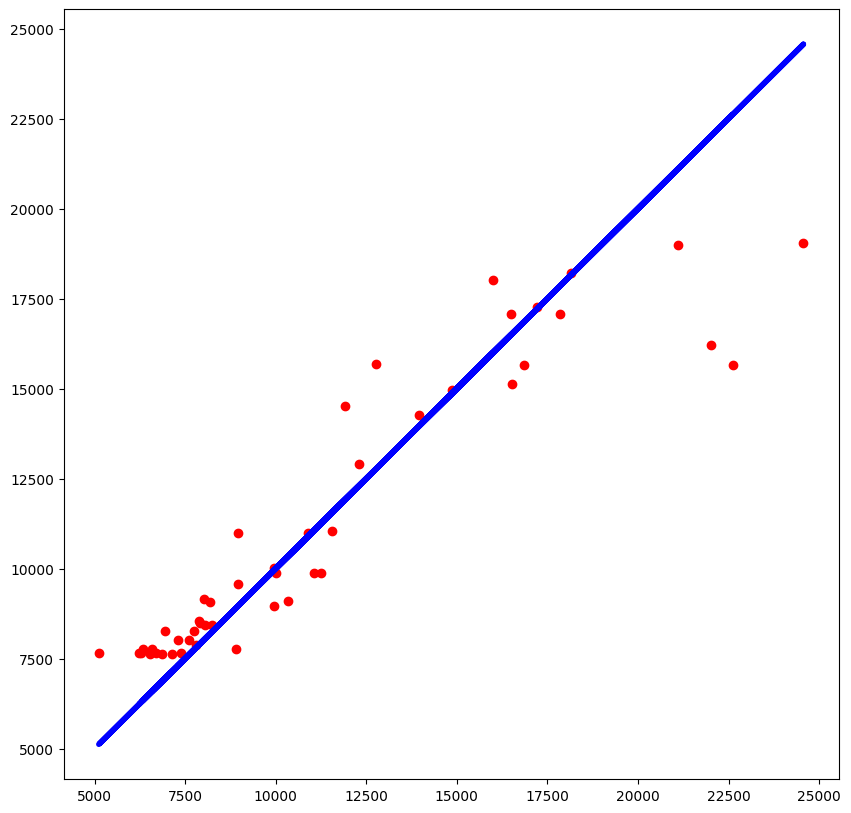

In [68]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,adpred,color='r')
plt.plot(y_test,y_test,color='b',linewidth='4')
plt.show()